## Project Title: 
## To analyse the prevalence of the diabetes over the world and to analyse the diabetic hospitalisations data in US

## Importing the required libraries

In [128]:
library(tidyverse)
library(magrittr) # better handling of pipes
library(purrr) # to work with lists and map functions
library(glue) # to paste strings 
library(stringr) # to hand strings
library(rvest) # to make scraping easier
library(politeness) # (polite has been changed to politeness). politeness is the "polite" version of rvest
library(htmltab)
library(dplyr)
library(tidyr)

In [129]:
library(visdat)
library(skimr)
library(readr)
#install.packages("rworldmap")
library(rworldmap)
library(choroplethr)
library(choroplethrMaps)

## Web scraping of WHO website using R to get the required data for diabetes

In [130]:
#The url title is used to scrape the data from WHO website. It has been confirmed that no web scraping policy has been breached  
url_titles <- "http://www.who.int/diabetes/facts/world_figures/en/index1.html" # this is the base url from where the scraping starts
page_title <- read_html(url_titles)

In [131]:
page_title %>% typeof()
page_title %>% glimpse()

[1] "list"

List of 2
 $ node:<externalptr> 
 $ doc :<externalptr> 
 - attr(*, "class")= chr [1:2] "xml_document" "xml_node"


In [132]:
#html structure of WHO web page 
page_title %>%
 html_structure() 

<html>
  <head>
    <meta [http-equiv, content]>
    <meta [http-equiv, content]>
    <meta [name, content]>
    <script [src, type]>
    <script [src, type]>
    <title>
      {text}
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <script [type]>
      {cdata}
    <link [rel, href]>
    <link [rel, href]>
    <script [type, src]>
    <script [type, src]>
    {comment}
    <script [type, src]>
    <script [type, src]>
    <script [type, src]>
    <script [type, src]>
    <link [href, rel, type]>
    {comment}
    {comment}
    {comment}
    {comment}
    {comment}
    {comment}
    <link [rel, type, href]>
    <script [type, src]>
    <link [rel, type, href]>
    <script [type, src]>
    <script [type]>
      {cdata}
    {comment}
    <s

## Scraping the table for AFRICA REGION

In [133]:
africa_table <- page_title %>%
html_nodes("table.tableData") %>% 
html_table(header=T)

In [134]:
africa_table #This is a scraped table for Africa region

[[1]]
                            Country      2000       2030
1                           Algeria   426,000  1,203,000
2                            Angola    51,000    140,000
3                             Benin    87,000    266,000
4                          Botswana    25,000     45,000
5                      Burkina Faso   124,000    388,000
6                           Burundi    26,000     72,000
7                          Cameroon    70,000    171,000
8                        Cape Verde     7,000     24,000
9          Central African Republic    18,000     38,000
10                             Chad    97,000    269,000
11                          Comoros     4,000     15,000
12                            Congo    14,000     39,000
13                    Côte d'Ivoire   264,000    636,000
14 Democratic Republic of the Congo   291,000    910,000
15                Equatorial Guinea     8,000     21,000
16                          Eritrea    47,000    142,000
17                         Ethiopia   796,000  1,820,000
18                            Gabon     8,000     14,000
19                           Gambia    22,000     61,000
20                            Ghana   302,000    851,000
21                           Guinea    34,000     89,000
22                    Guinea-Bissau    17,000     44,000
23                            Kenya   183,000    498,000
24                          Lesotho    31,000     42,000
25                          Liberia    40,000    154,000
26                       Madagascar   100,000    301,000
27                           Malawi    55,000    118,000
28                             Mali   140,000    405,000
29                       Mauritania    34,000    103,000
30                        Mauritius   111,000    233,000
31                       Mozambique   133,000    273,000
32                          Namibia    25,000     60,000
33                            Niger   108,000    382,000
34                          Nigeria 1,707,000  4,835,000
35                           Rwanda    30,000     77,000
36                Sao Tome-Principe     1,000      2,000
37                          Senegal   143,000    421,000
38                       Seychelles     8,000     19,000
39                     Sierra Leone    65,000    178,000
40                     South Africa   814,000  1,286,000
41                        Swaziland    13,000     21,000
42                             Togo    64,000    184,000
43                           Uganda    98,000    328,000
44      United Republic of Tanzania   201,000    605,000
45                           Zambia    70,000    186,000
46                         Zimbabwe   108,000    265,000
47                            Total 7,020,000 18,234,000

After scraping the table it is was necessary to convert the scraped table into a dataframe. We renamed the dataframe as africa_df.
as.data.frame function came in handy to do the job.

In [135]:
africa_df <- as.data.frame(africa_table) 

In [136]:
africa_df %>% head()

Country      X2000   X2030    
1 Algeria      426,000 1,203,000
2 Angola       51,000  140,000  
3 Benin        87,000  266,000  
4 Botswana     25,000  45,000   
5 Burkina Faso 124,000 388,000  
6 Burundi      26,000  72,000

It can be seen that the column names of years contain X therefore, renaming the columns to the desired names was necesary.The code written below completes the requirement.  

In [137]:
columns_wanted <- c("Country", "X2000", "X2030")
africa_df <- africa_df[columns_wanted]

In [138]:
colnames(africa_df) <- c("COUNTRY", "2000", "2030")

In [139]:
africa_df %>% head(5)

COUNTRY      2000    2030     
1 Algeria      426,000 1,203,000
2 Angola       51,000  140,000  
3 Benin        87,000  266,000  
4 Botswana     25,000  45,000   
5 Burkina Faso 124,000 388,000

## Scrape the table for EASTERN MEDITERRANEAN REGION. 
Please note that same procedure has been repeated for other regions to get the data.

In [140]:
#Scraping table from a webpage using xpath
url_titles_2 <- "http://www.who.int/diabetes/facts/world_figures/en/index2.html" # this is the base url from where the scraping starts
page_title_2 <- read_html(url_titles_2)
east_med_table <- page_title_2 %>%
html_nodes("table.tableData") %>% 
html_table(header=T)
east_med_table

[[1]]
                    Country       2000       2030
1               Afghanistan    468,000  1,403,000
2                   Bahrain     37,000     99,000
3                    Cyprus     50,000     87,000
4                  Djibouti      7,000      9,000
5                     Egypt  2,623,000  6,726,000
6  Islamic Republic of Iran  2,103,000  6,421,000
7                      Iraq    668,000  2,009,000
8                    Jordan    195,000    680,000
9                    Kuwait    104,000    319,000
10                  Lebanon    146,000    378,000
11   Libyan Arab Jamahiriya     88,000    245,000
12                  Morocco    427,000  1,138,000
13                     Oman    113,000    343,000
14                 Pakistan  5,217,000 13,853,000
15                    Qatar     38,000     88,000
16             Saudi Arabia    890,000  2,523,000
17                  Somalia     97,000    331,000
18                    Sudan    447,000  1,277,000
19     Syrian Arab Republic    627,000  2,313,000
20                  Tunisia    166,000    388,000
21     United Arab Emirates    350,000    684,000
22                    Yemen    327,000  1,286,000
23                    Total 15,188,000 42,600,000

In [141]:
east_med_df <- as.data.frame(east_med_table) 
east_med_df %>% head()

Country                  X2000     X2030    
1 Afghanistan              468,000   1,403,000
2 Bahrain                  37,000    99,000   
3 Cyprus                   50,000    87,000   
4 Djibouti                 7,000     9,000    
5 Egypt                    2,623,000 6,726,000
6 Islamic Republic of Iran 2,103,000 6,421,000

Renaming the columns

In [142]:
columns_wanted <- c("Country", "X2000", "X2030")
east_med_df <- east_med_df[columns_wanted]
colnames(east_med_df) <- c("COUNTRY", "2000", "2030")
east_med_df %>% head()

COUNTRY                  2000      2030     
1 Afghanistan              468,000   1,403,000
2 Bahrain                  37,000    99,000   
3 Cyprus                   50,000    87,000   
4 Djibouti                 7,000     9,000    
5 Egypt                    2,623,000 6,726,000
6 Islamic Republic of Iran 2,103,000 6,421,000

Scrape the table for AMERICAS REGION

In [143]:
#Scraping table from a webpage using xpath
url_titles_3 <- "http://www.who.int/diabetes/facts/world_figures/en/index3.html" # this is the base url from where the scraping starts
page_title_3 <- read_html(url_titles_3)
americas_table <- page_title_3 %>%
html_nodes("table.tableData") %>% 
html_table(header=T)
americas_table

[[1]]
                            Country       2000       2030
1               Antigua and Barbuda      3,000      5,000
2                         Argentina  1,426,000  2,457,000
3                           Bahamas     12,000     26,000
4                          Barbados     11,000     22,000
5                            Belize      5,000     15,000
6                           Bolivia    207,000    562,000
7                            Brazil  4,553,000 11,305,000
8                            Canada  2,006,000  3,543,000
9                             Chile    495,000  1,047,000
10                         Colombia    883,000  2,425,000
11                       Costa Rica     76,000    237,000
12                             Cuba    480,000    855,000
13                         Dominica      3,000      4,000
14               Dominican Republic    245,000    594,000
15                          Ecuador    341,000    921,000
16                      El Salvador    103,000    320,000
17                          Grenada      4,000      7,000
18                        Guatemala    139,000    447,000
19                           Guyana     19,000     36,000
20                            Haiti    161,000    401,000
21                         Honduras     81,000    269,000
22                          Jamaica     81,000    189,000
23                           Mexico  2,179,000  6,130,000
24                        Nicaragua     68,000    246,000
25                           Panama     59,000    155,000
26                         Paraguay    102,000    324,000
27                             Peru    754,000  1,961,000
28            Saint Kitts and Nevis      2,000      2,000
29                      Saint Lucia      5,000     11,000
30 Saint Vincent and the Grenadines      5,000      9,000
31                         Suriname      9,000     20,000
32              Trinidad and Tobago     60,000    125,000
33         United States of America 17,702,000 30,312,000
34                          Uruguay    154,000    224,000
35                        Venezuela    583,000  1,606,000
36                            Total 33,016,000 66,812,000

In [144]:
americas_df <- as.data.frame(americas_table) 
americas_df %>% head()

Country             X2000     X2030    
1 Antigua and Barbuda 3,000     5,000    
2 Argentina           1,426,000 2,457,000
3 Bahamas             12,000    26,000   
4 Barbados            11,000    22,000   
5 Belize              5,000     15,000   
6 Bolivia             207,000   562,000

Renaming the columns

In [145]:
columns_wanted <- c("Country", "X2000", "X2030")
americas_df <- americas_df[columns_wanted]
colnames(americas_df) <- c("COUNTRY", "2000", "2030")
americas_df %>% head()

COUNTRY             2000      2030     
1 Antigua and Barbuda 3,000     5,000    
2 Argentina           1,426,000 2,457,000
3 Bahamas             12,000    26,000   
4 Barbados            11,000    22,000   
5 Belize              5,000     15,000   
6 Bolivia             207,000   562,000

## Scraping the table for ASIA REGION

In [146]:
#Scraping table from a webpage using xpath
url_titles_4 <- "http://www.who.int/diabetes/facts/world_figures/en/index5.html" # this is the base url from where the scraping starts
page_title_4 <- read_html(url_titles_4)
asia_table <- page_title_4 %>%
html_nodes("table.tableData") %>% 
html_table(header=T)
asia_table

[[1]]
                       Country       2000        2030
1                   Bangladesh  3,196,000  11,140,000
2                       Bhutan     35,000     109,000
3  Dem. People's Rep. of Korea    367,000     635,000
4                        India 31,705,000  79,441,000
5                    Indonesia  8,426,000  21,257,000
6                     Maldives      6,000      25,000
7                      Myanmar    543,000   1,330,000
8                        Nepal    436,000   1,328,000
9                    Sri Lanka    653,000   1,537,000
10                    Thailand  1,536,000   2,739,000
11                       Total 46,903,000 119,541,000

In [147]:
asia_df <- as.data.frame(asia_table) 
asia_df %>% head()

Country                     X2000      X2030     
1 Bangladesh                  3,196,000  11,140,000
2 Bhutan                      35,000     109,000   
3 Dem. People's Rep. of Korea 367,000    635,000   
4 India                       31,705,000 79,441,000
5 Indonesia                   8,426,000  21,257,000
6 Maldives                    6,000      25,000

Renaming the columns 

In [148]:
columns_wanted <- c("Country", "X2000", "X2030")
asia_df <- asia_df[columns_wanted]
colnames(asia_df) <- c("COUNTRY", "2000", "2030")
asia_df %>% head()

COUNTRY                     2000       2030      
1 Bangladesh                  3,196,000  11,140,000
2 Bhutan                      35,000     109,000   
3 Dem. People's Rep. of Korea 367,000    635,000   
4 India                       31,705,000 79,441,000
5 Indonesia                   8,426,000  21,257,000
6 Maldives                    6,000      25,000

## Scraping the table for WESTERN PACIFIC REGION

In [149]:
#Scraping table from a webpage using xpath
url_titles_5 <- "http://www.who.int/diabetes/facts/world_figures/en/index6.html" # this is the base url from where the scraping starts
page_title_5 <- read_html(url_titles_5)
west_table <- page_title_5 %>%
html_nodes("table.tableData") %>% 
html_table(header=T)
west_table

[[1]]
                          Country       2000       2030
1                       Australia    941,000  1,673,000
2               Brunei Darussalam     18,000     49,000
3                        Cambodia    110,000    317,000
4                           China 20,757,000 42,321,000
5                    Cook Islands        700      1,300
6                            Fiji     37,000     72,000
7                           Japan  6,765,000  8,914,000
8                        Kiribati      4,000      7,000
9          Lao People's Dem. Rep.     46,000    128,000
10                       Malaysia    942,000  2,479,000
11               Marshall Islands      2,000      4,000
12 Federated States of Micronesia      5,000     13,000
13                       Mongolia     34,000     81,000
14                          Nauru      2,000      4,000
15                    New Zealand    179,000    307,000
16                           Niue         <>         <>
17                          Palau      1,000      2,000
18               Papua New Guinea    152,000    392,000
19                    Philippines  2,770,000  7,798,000
20              Republic of Korea  1,859,000  3,378,000
21                          Samoa      4,000      7,000
22                      Singapore    328,000    695,000
23                Solomon Islands     13,000     41,000
24                          Tonga      3,000      6,000
25                         Tuvalu        300        800
26                        Vanuatu      6,000     17,000
27                       Viet Nam    792,000  2,343,000
28                          Total 35,771,000 71,050,100

In [150]:
west_df <- as.data.frame(west_table) 
west_df %>% head()

Country           X2000      X2030     
1 Australia         941,000    1,673,000 
2 Brunei Darussalam 18,000     49,000    
3 Cambodia          110,000    317,000   
4 China             20,757,000 42,321,000
5 Cook Islands      700        1,300     
6 Fiji              37,000     72,000

Renaming the columns 

In [151]:
columns_wanted <- c("Country", "X2000", "X2030")
west_df <- west_df[columns_wanted]
colnames(west_df) <- c("COUNTRY", "2000", "2030")
west_df %>% head()

COUNTRY           2000       2030      
1 Australia         941,000    1,673,000 
2 Brunei Darussalam 18,000     49,000    
3 Cambodia          110,000    317,000   
4 China             20,757,000 42,321,000
5 Cook Islands      700        1,300     
6 Fiji              37,000     72,000

After scraping all the required tables, a big dataframe was created for visualisation and anaylsis purposes. 

In [152]:
countries_df <- list(africa_df,
                     east_med_df,
                     americas_df,
                     asia_df,
                    west_df)

In [153]:
big_country_df <- bind_rows(countries_df)

In [154]:
columns_wanted <- c("COUNTRY","2000", "2030")
big_country_df <- big_country_df[columns_wanted]
colnames(big_country_df) <- c("COUNTRY", "YR2000_COUNT", "YR2030_COUNT")

In [155]:
big_country_df %>% head()

COUNTRY      YR2000_COUNT YR2030_COUNT
1 Algeria      426,000      1,203,000   
2 Angola       51,000       140,000     
3 Benin        87,000       266,000     
4 Botswana     25,000       45,000      
5 Burkina Faso 124,000      388,000     
6 Burundi      26,000       72,000

In [156]:
big_country_df %>% glimpse()

Observations: 145
Variables: 3
$ COUNTRY      <chr> "Algeria", "Angola", "Benin", "Botswana", "Burkina Fas...
$ YR2000_COUNT <chr> "426,000", "51,000", "87,000", "25,000", "124,000", "2...
$ YR2030_COUNT <chr> "1,203,000", "140,000", "266,000", "45,000", "388,000"...


In [157]:
library(stringr)
# "1,203,000" %>% str_replace_all(pattern = ",", replacement = '')
# "1,203,000" %>% str_remove_all(",")
big_country_df2 <- as.data.frame(na.omit(big_country_df))
big_country_df2$YR2000_COUNT %<>% str_replace_all(",", "")

big_country_df2$YR2030_COUNT %<>% str_replace_all(",", "")

big_country_df2 %>% head()
# df2$YR2000_COUNT <- (gsub(","," ",df2$YR2000_COUNT))

big_country_df2 %<>% mutate("YR2000" = as.double(big_country_df2$YR2000_COUNT))
big_country_df2 %<>% mutate("YR2030" = as.double(big_country_df2$YR2030_COUNT))

big_country_df2 %>% str()

big_country_df2 %>% head()

COUNTRY      YR2000_COUNT YR2030_COUNT
1 Algeria      426000       1203000     
2 Angola       51000        140000      
3 Benin        87000        266000      
4 Botswana     25000        45000       
5 Burkina Faso 124000       388000      
6 Burundi      26000        72000

Warning message in evalq(as.double(big_country_df2$YR2000_COUNT), <environment>):
"NAs introduced by coercion"Warning message in evalq(as.double(big_country_df2$YR2030_COUNT), <environment>):
"NAs introduced by coercion"

'data.frame':	145 obs. of  5 variables:
 $ COUNTRY     : chr  "Algeria" "Angola" "Benin" "Botswana" ...
 $ YR2000_COUNT: chr  "426000" "51000" "87000" "25000" ...
 $ YR2030_COUNT: chr  "1203000" "140000" "266000" "45000" ...
 $ YR2000      : num  426000 51000 87000 25000 124000 26000 70000 7000 18000 97000 ...
 $ YR2030      : num  1203000 140000 266000 45000 388000 ...


COUNTRY      YR2000_COUNT YR2030_COUNT YR2000 YR2030 
1 Algeria      426000       1203000      426000 1203000
2 Angola       51000        140000        51000  140000
3 Benin        87000        266000        87000  266000
4 Botswana     25000        45000         25000   45000
5 Burkina Faso 124000       388000       124000  388000
6 Burundi      26000        72000         26000   72000

In [158]:
final_country_df <- big_country_df2 %>% select("COUNTRY", "YR2000", "YR2030")

In [159]:
final_country_df %>% head()

COUNTRY      YR2000 YR2030 
1 Algeria      426000 1203000
2 Angola        51000  140000
3 Benin         87000  266000
4 Botswana      25000   45000
5 Burkina Faso 124000  388000
6 Burundi       26000   72000

## Visualisations

A visdat library was useful to skim through the dtaset for misisng values 

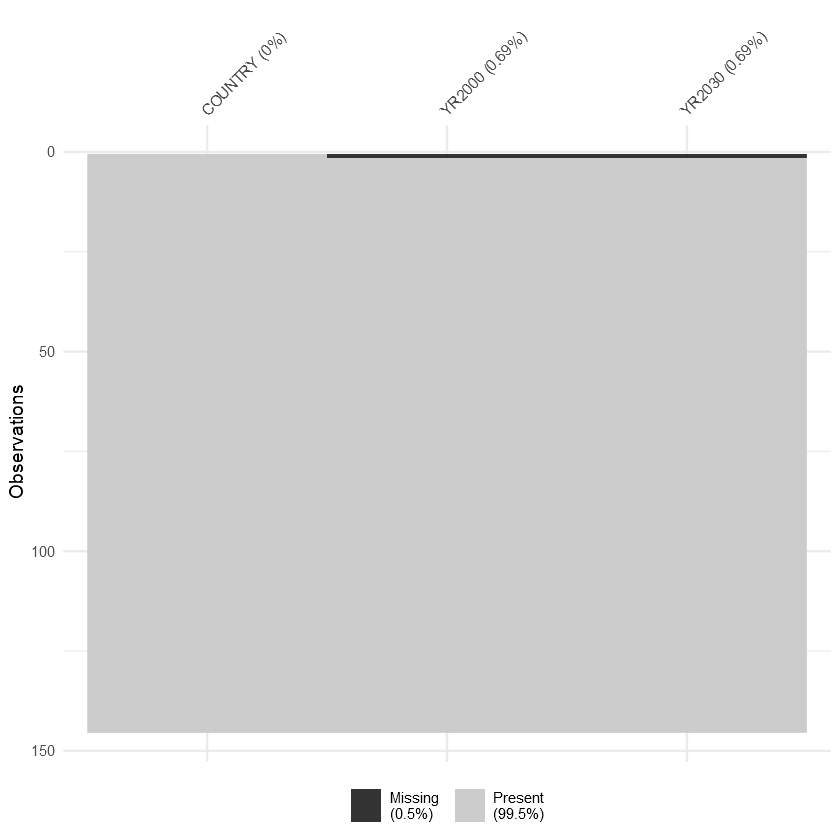

In [160]:

final_country_df %>% vis_miss(cluster=TRUE)

The RworldMap package is a handy tool to visualise the data for the world. More information about the package can be found here. 


In [161]:
library(rworldmap)
mapped_data <- joinCountryData2Map(final_country_df , joinCode = "NAME", 
    nameJoinColumn = "COUNTRY")

135 codes from your data successfully matched countries in the map
10 codes from your data failed to match with a country code in the map
108 codes from the map weren't represented in your data


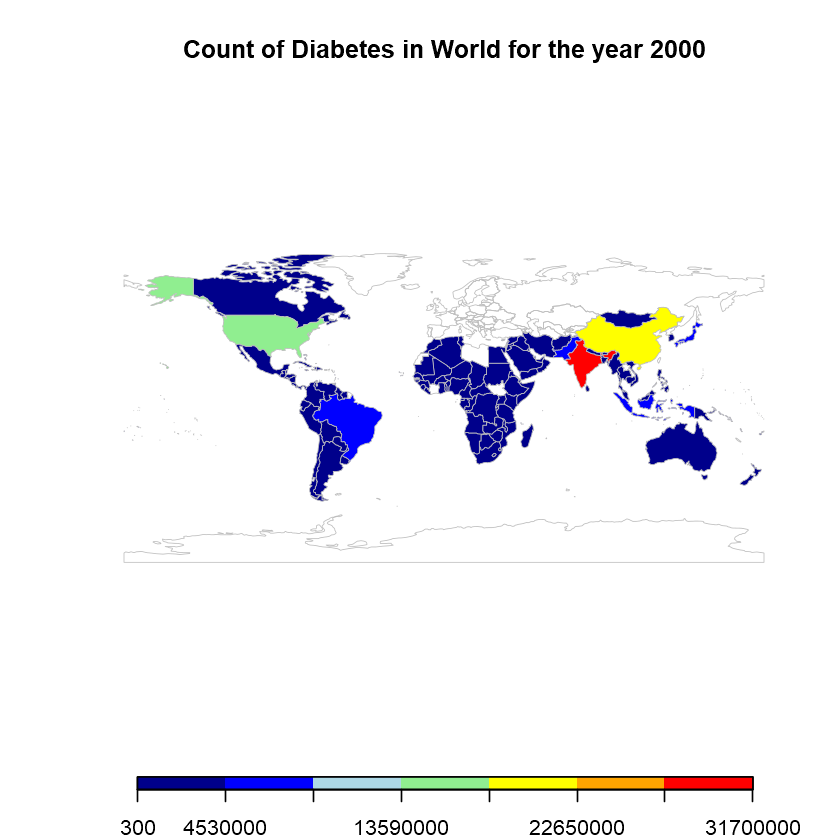

In [162]:
mapParams <- mapCountryData(
    mapped_data, nameColumnToPlot = "YR2000",
    colourPalette='negpos8',
    catMethod='fixedWidth',
    mapTitle = "Count of Diabetes in World for the year 2000",
    addLegend = "FALSE"
)

do.call( addMapLegend, c( mapParams, 
                         legendLabels="all",
                         legendWidth=0.5,
                         legendIntervals="data",
                         legendMar = 2 ))
#white2Black black2White palette heat topo terrain rainbow negpos8 negpos9 

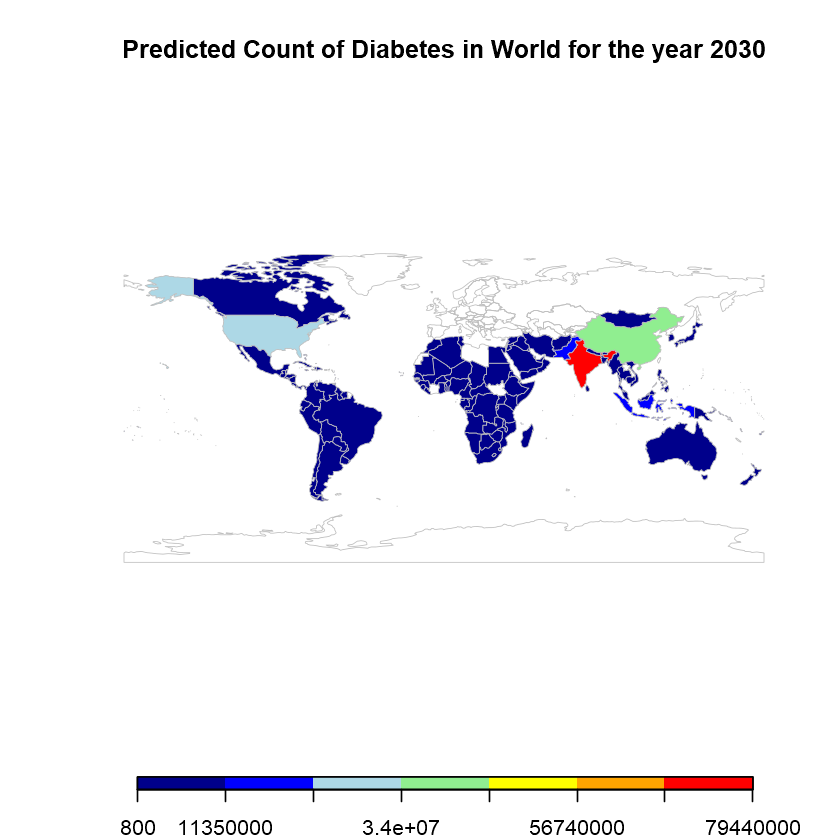

In [163]:
mapParams <- mapCountryData(
    mapped_data, 
    nameColumnToPlot = "YR2030",
    colourPalette='negpos8',
    catMethod='fixedWidth',
    mapTitle = "Predicted Count of Diabetes in World for the year 2030",
    addLegend = "FALSE"
)

do.call( addMapLegend, c( mapParams, 
                         legendLabels="all",
                         legendWidth=0.5,
                         legendIntervals="data",
                         legendMar = 2 ))

## PDF report table scraping using R

## After vigorous search on internet it was found out that the library tabulizer is not comaptible with Jupyter lab. Therefore, the scraping task was performed in Rstudio and the cleaned dataframe (table) was written to csv which is loaded below
## (Rstudio code file will be uploaded in the final deliverable)
Reference:https://github.com/jupyterlab/jupyterlab/issues/4508

In [164]:
#library(tabulizer)
#library(dplyr)

## Europe region

In [165]:
europe_df <- read.csv("Europe.csv")

In [166]:
europe_df %>% head()

COUNTRY     POPULATION CASES   PREVALENCE AGE_ADJUSTED_PREVALENCE DEATHS
1 Albania*    2,240,260  267,267 11.9       9.9                     2,846 
2 Andorra*    56,840     7,220   12.7       8.0                     32    
3 Armenia*    2,367,198  179,020  7.6       6.9                     2,301 
4 Austria     7,110,252  705,863  9.9       6.5                     4,963 
5 Azerbaijan* 7,313,990  506,330  6.9       6.9                     5,152 
6 Belarus*    7,620,660  543,917  7.1       5.9                     11,564
  COST_PER_PERSON UNDIAGNOSED_CASES ONE_IN_X_HAS_DIABETES
1 368.67          108,610            8                   
2 4,431.08        2,581              8                   
3 228.41          72,749            13                   
4 7,068.29        252,369           10                   
5 731.16          205,759           14                   
6 641.16          221,034           14

In [167]:
str(europe_df)

'data.frame':	57 obs. of  9 variables:
 $ COUNTRY                : Factor w/ 57 levels "Albania*","Andorra*",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ POPULATION             : Factor w/ 56 levels "1,058,334","1,601,404",..: 10 43 12 47 48 49 55 17 38 8 ...
 $ CASES                  : Factor w/ 57 levels "1,115,155","1,273,112",..: 22 47 8 49 38 39 43 29 36 48 ...
 $ PREVALENCE             : num  11.9 12.7 7.6 9.9 6.9 7.1 6.8 12.6 8.2 5.7 ...
 $ AGE_ADJUSTED_PREVALENCE: num  9.9 8 6.9 6.5 6.9 5.9 4.4 9.9 5.8 4.2 ...
 $ DEATHS                 : Factor w/ 55 levels "-","1,092","1,348",..: 21 38 17 40 41 6 39 43 53 1 ...
 $ COST_PER_PERSON        : Factor w/ 53 levels "-","1,204.71",..: 28 31 23 45 47 43 42 37 51 1 ...
 $ UNDIAGNOSED_CASES      : Factor w/ 57 levels "1,018","1,116,468",..: 9 19 49 29 23 24 25 15 14 21 ...
 $ ONE_IN_X_HAS_DIABETES  : int  8 8 13 10 14 14 15 8 12 18 ...


In [168]:
mapped_data <- joinCountryData2Map(europe_df , joinCode = "NAME", 
    nameJoinColumn = "COUNTRY")

35 codes from your data successfully matched countries in the map
22 codes from your data failed to match with a country code in the map
208 codes from the map weren't represented in your data


In [169]:
europe_df[, "CASES"] <- sapply(europe_df[, "CASES"], as.numeric)
str(europe_df)

'data.frame':	57 obs. of  9 variables:
 $ COUNTRY                : Factor w/ 57 levels "Albania*","Andorra*",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ POPULATION             : Factor w/ 56 levels "1,058,334","1,601,404",..: 10 43 12 47 48 49 55 17 38 8 ...
 $ CASES                  : num  22 47 8 49 38 39 43 29 36 48 ...
 $ PREVALENCE             : num  11.9 12.7 7.6 9.9 6.9 7.1 6.8 12.6 8.2 5.7 ...
 $ AGE_ADJUSTED_PREVALENCE: num  9.9 8 6.9 6.5 6.9 5.9 4.4 9.9 5.8 4.2 ...
 $ DEATHS                 : Factor w/ 55 levels "-","1,092","1,348",..: 21 38 17 40 41 6 39 43 53 1 ...
 $ COST_PER_PERSON        : Factor w/ 53 levels "-","1,204.71",..: 28 31 23 45 47 43 42 37 51 1 ...
 $ UNDIAGNOSED_CASES      : Factor w/ 57 levels "1,018","1,116,468",..: 9 19 49 29 23 24 25 15 14 21 ...
 $ ONE_IN_X_HAS_DIABETES  : int  8 8 13 10 14 14 15 8 12 18 ...


In [170]:
mapParams <- mapCountryData(
    mapped_data, 
    nameColumnToPlot = "PREVALENCE",
    colourPalette='negpos8',
    catMethod='fixedWidth',
    mapTitle = "Diabetes Prevalence in Europe for year 2017",
    addLegend = "FALSE"
)

do.call( addMapLegend, c( mapParams, 
                         legendLabels="all",
                         legendWidth=0.5,
                         legendIntervals="data",
                         legendMar = 2 ))

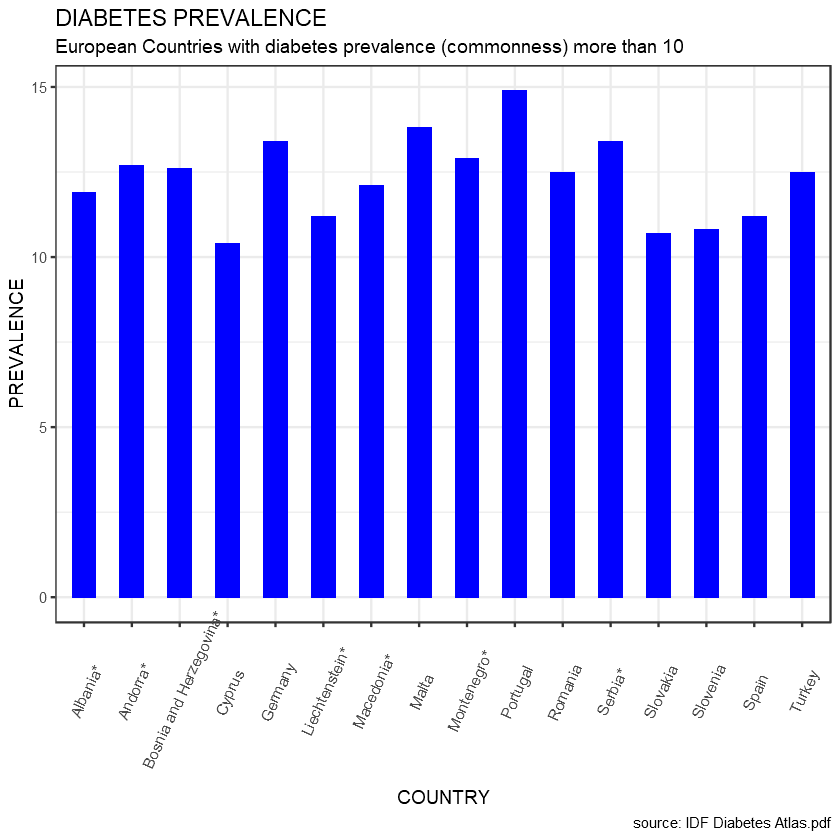

In [171]:
library(ggplot2)
theme_set(theme_bw())

prevalent_eu_countries <- europe_df %>% 
filter(PREVALENCE >=10) %>% arrange(desc(CASES)) 

# Draw plot
ggplot(prevalent_eu_countries, aes(x=COUNTRY, y=PREVALENCE)) + 
  geom_bar(stat="identity", width=.5, fill="blue") + 
  labs(title="DIABETES PREVALENCE", 
       subtitle="European Countries with diabetes prevalence (commonness) more than 10", 
       caption="source: IDF Diabetes Atlas.pdf") + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6))

## After reviewing global status of Diabetes lets focus on country level. We have chosen US (United States).
## WHY US
## -It was easier to find US data on internet
## -US is of third most populated country

I found a dataframe which contains the data about US diabetes mortality rates throughout the counties and states.

In [172]:
mortality_df <- read.csv("US MORTALITY.csv")

A function to use first row as a column header

In [173]:
#Reference: https://stackoverflow.com/questions/32054368/use-first-row-data-as-column-names-in-r?rq=1
header_true <- function(df) {
  names(df) <- as.character(unlist(df[1,]))
  df[-1,]
}

In [174]:
mortality_df_2 <- header_true(mortality_df)

In [175]:
mortality_df_2 %>% head(5)

Location                FIPS Mortality Rate, 1980* Mortality Rate, 1985*
2 United States                46.20 (44.96, 47.56)  47.35 (46.35, 48.43) 
3 Alabama                 1    57.83 (56.10, 59.56)  58.79 (57.48, 60.19) 
4 Autauga County, Alabama 1001 54.08 (50.06, 58.40)  56.46 (52.61, 60.41) 
5 Baldwin County, Alabama 1003 46.30 (43.40, 49.00)  44.87 (42.60, 47.33) 
6 Barbour County, Alabama 1005 64.02 (59.77, 68.43)  63.88 (60.01, 67.75) 
  Mortality Rate, 1990* Mortality Rate, 1995* Mortality Rate, 2000*
2 49.11 (48.05, 50.17)  53.58 (52.41, 54.81)  58.01 (56.75, 59.31) 
3 61.83 (60.38, 63.15)  68.46 (66.81, 70.19)  74.81 (73.11, 76.57) 
4 60.00 (56.64, 63.59)  66.41 (62.87, 70.13)  72.61 (69.17, 76.36) 
5 46.33 (44.08, 48.61)  50.03 (47.63, 52.60)  52.70 (50.37, 54.97) 
6 64.93 (61.36, 68.17)  70.88 (67.30, 74.81)  77.21 (73.19, 81.46) 
  Mortality Rate, 2005* Mortality Rate, 2010* Mortality Rate, 2014*
2 59.04 (57.72, 60.44)  55.70 (54.34, 57.00)  55.89 (54.35, 57.36) 
3 76.62 (74.79, 78.59)  72.34 (70.54, 74.13)  70.81 (68.84, 72.75) 
4 78.25 (74.33, 82.13)  72.46 (68.53, 76.45)  74.98 (70.81, 79.32) 
5 51.59 (49.37, 53.96)  50.44 (48.16, 52.89)  49.57 (47.22, 52.04) 
6 77.96 (73.57, 81.98)  73.12 (68.81, 77.37)  72.73 (68.41, 77.24) 
  % Change in Mortality Rate, 1980-2014
2 20.98 (16.87, 24.94)                 
3 22.44 (18.10, 26.86)                 
4 38.63 (25.60, 52.24)                 
5 7.06 (-0.48, 16.32)                  
6 13.60 (3.89, 24.82)

Here it can be seen that the row index starts from number 2 so the follwing code fixes that problem.

In [176]:
rownames(mortality_df_2) <- 1:nrow(mortality_df_2)

In [177]:
mortality_df_2 %>% head(5)

Location                FIPS Mortality Rate, 1980* Mortality Rate, 1985*
1 United States                46.20 (44.96, 47.56)  47.35 (46.35, 48.43) 
2 Alabama                 1    57.83 (56.10, 59.56)  58.79 (57.48, 60.19) 
3 Autauga County, Alabama 1001 54.08 (50.06, 58.40)  56.46 (52.61, 60.41) 
4 Baldwin County, Alabama 1003 46.30 (43.40, 49.00)  44.87 (42.60, 47.33) 
5 Barbour County, Alabama 1005 64.02 (59.77, 68.43)  63.88 (60.01, 67.75) 
  Mortality Rate, 1990* Mortality Rate, 1995* Mortality Rate, 2000*
1 49.11 (48.05, 50.17)  53.58 (52.41, 54.81)  58.01 (56.75, 59.31) 
2 61.83 (60.38, 63.15)  68.46 (66.81, 70.19)  74.81 (73.11, 76.57) 
3 60.00 (56.64, 63.59)  66.41 (62.87, 70.13)  72.61 (69.17, 76.36) 
4 46.33 (44.08, 48.61)  50.03 (47.63, 52.60)  52.70 (50.37, 54.97) 
5 64.93 (61.36, 68.17)  70.88 (67.30, 74.81)  77.21 (73.19, 81.46) 
  Mortality Rate, 2005* Mortality Rate, 2010* Mortality Rate, 2014*
1 59.04 (57.72, 60.44)  55.70 (54.34, 57.00)  55.89 (54.35, 57.36) 
2 76.62 (74.79, 78.59)  72.34 (70.54, 74.13)  70.81 (68.84, 72.75) 
3 78.25 (74.33, 82.13)  72.46 (68.53, 76.45)  74.98 (70.81, 79.32) 
4 51.59 (49.37, 53.96)  50.44 (48.16, 52.89)  49.57 (47.22, 52.04) 
5 77.96 (73.57, 81.98)  73.12 (68.81, 77.37)  72.73 (68.41, 77.24) 
  % Change in Mortality Rate, 1980-2014
1 20.98 (16.87, 24.94)                 
2 22.44 (18.10, 26.86)                 
3 38.63 (25.60, 52.24)                 
4 7.06 (-0.48, 16.32)                  
5 13.60 (3.89, 24.82)

Still battle doesnt end here! it has just started! this dataset seemed ideal for wrangling.
Following code renames the columns

In [178]:
columns_wanted <- c("Location",	"FIPS", "Mortality Rate, 1980*", "Mortality Rate, 1985*", "Mortality Rate, 1990*",	"Mortality Rate, 1995*",	"Mortality Rate, 2000*",	"Mortality Rate, 2005*",	"Mortality Rate, 2010*",	"Mortality Rate, 2014*",	"% Change in Mortality Rate, 1980-2014")
mortality_df_2 <- mortality_df_2[columns_wanted]

In [179]:
colnames(mortality_df_2) <- c("LOCATION", "FIPS", "MORTALITY_1980",  "MORTALITY_1985", "MORTALITY_1990","MORTALITY_1995", "MORTALITY_2000", "MORTALITY_2005", "MORTALITY_2010", "MORTALITY_2014", "CHANGE")

Now lets deal with the number in the brackets in each mortality column 

In [180]:
mortality_df_2 %>% na.omit(mortality_df_2) %>% head(5)

LOCATION                FIPS MORTALITY_1980       MORTALITY_1985      
1 United States                46.20 (44.96, 47.56) 47.35 (46.35, 48.43)
2 Alabama                 1    57.83 (56.10, 59.56) 58.79 (57.48, 60.19)
3 Autauga County, Alabama 1001 54.08 (50.06, 58.40) 56.46 (52.61, 60.41)
4 Baldwin County, Alabama 1003 46.30 (43.40, 49.00) 44.87 (42.60, 47.33)
5 Barbour County, Alabama 1005 64.02 (59.77, 68.43) 63.88 (60.01, 67.75)
  MORTALITY_1990       MORTALITY_1995       MORTALITY_2000      
1 49.11 (48.05, 50.17) 53.58 (52.41, 54.81) 58.01 (56.75, 59.31)
2 61.83 (60.38, 63.15) 68.46 (66.81, 70.19) 74.81 (73.11, 76.57)
3 60.00 (56.64, 63.59) 66.41 (62.87, 70.13) 72.61 (69.17, 76.36)
4 46.33 (44.08, 48.61) 50.03 (47.63, 52.60) 52.70 (50.37, 54.97)
5 64.93 (61.36, 68.17) 70.88 (67.30, 74.81) 77.21 (73.19, 81.46)
  MORTALITY_2005       MORTALITY_2010       MORTALITY_2014      
1 59.04 (57.72, 60.44) 55.70 (54.34, 57.00) 55.89 (54.35, 57.36)
2 76.62 (74.79, 78.59) 72.34 (70.54, 74.13) 70.81 (68.84, 72.75)
3 78.25 (74.33, 82.13) 72.46 (68.53, 76.45) 74.98 (70.81, 79.32)
4 51.59 (49.37, 53.96) 50.44 (48.16, 52.89) 49.57 (47.22, 52.04)
5 77.96 (73.57, 81.98) 73.12 (68.81, 77.37) 72.73 (68.41, 77.24)
  CHANGE              
1 20.98 (16.87, 24.94)
2 22.44 (18.10, 26.86)
3 38.63 (25.60, 52.24)
4 7.06 (-0.48, 16.32) 
5 13.60 (3.89, 24.82)

In [181]:
# remove_brackets <- function(df,column) {
#   df$column<- sub("\\s*\\(.*", "", df$column)
# }#

Now magic begins!

In [182]:
mortality_df_2$MORTALITY_1980<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_1980)
mortality_df_2 %>% head(5) 

LOCATION                FIPS MORTALITY_1980 MORTALITY_1985      
1 United States                46.20          47.35 (46.35, 48.43)
2 Alabama                 1    57.83          58.79 (57.48, 60.19)
3 Autauga County, Alabama 1001 54.08          56.46 (52.61, 60.41)
4 Baldwin County, Alabama 1003 46.30          44.87 (42.60, 47.33)
5 Barbour County, Alabama 1005 64.02          63.88 (60.01, 67.75)
  MORTALITY_1990       MORTALITY_1995       MORTALITY_2000      
1 49.11 (48.05, 50.17) 53.58 (52.41, 54.81) 58.01 (56.75, 59.31)
2 61.83 (60.38, 63.15) 68.46 (66.81, 70.19) 74.81 (73.11, 76.57)
3 60.00 (56.64, 63.59) 66.41 (62.87, 70.13) 72.61 (69.17, 76.36)
4 46.33 (44.08, 48.61) 50.03 (47.63, 52.60) 52.70 (50.37, 54.97)
5 64.93 (61.36, 68.17) 70.88 (67.30, 74.81) 77.21 (73.19, 81.46)
  MORTALITY_2005       MORTALITY_2010       MORTALITY_2014      
1 59.04 (57.72, 60.44) 55.70 (54.34, 57.00) 55.89 (54.35, 57.36)
2 76.62 (74.79, 78.59) 72.34 (70.54, 74.13) 70.81 (68.84, 72.75)
3 78.25 (74.33, 82.13) 72.46 (68.53, 76.45) 74.98 (70.81, 79.32)
4 51.59 (49.37, 53.96) 50.44 (48.16, 52.89) 49.57 (47.22, 52.04)
5 77.96 (73.57, 81.98) 73.12 (68.81, 77.37) 72.73 (68.41, 77.24)
  CHANGE              
1 20.98 (16.87, 24.94)
2 22.44 (18.10, 26.86)
3 38.63 (25.60, 52.24)
4 7.06 (-0.48, 16.32) 
5 13.60 (3.89, 24.82)

In [183]:
mortality_df_2$MORTALITY_1985<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_1985)
mortality_df_2 %>% head(5) 

LOCATION                FIPS MORTALITY_1980 MORTALITY_1985
1 United States                46.20          47.35         
2 Alabama                 1    57.83          58.79         
3 Autauga County, Alabama 1001 54.08          56.46         
4 Baldwin County, Alabama 1003 46.30          44.87         
5 Barbour County, Alabama 1005 64.02          63.88         
  MORTALITY_1990       MORTALITY_1995       MORTALITY_2000      
1 49.11 (48.05, 50.17) 53.58 (52.41, 54.81) 58.01 (56.75, 59.31)
2 61.83 (60.38, 63.15) 68.46 (66.81, 70.19) 74.81 (73.11, 76.57)
3 60.00 (56.64, 63.59) 66.41 (62.87, 70.13) 72.61 (69.17, 76.36)
4 46.33 (44.08, 48.61) 50.03 (47.63, 52.60) 52.70 (50.37, 54.97)
5 64.93 (61.36, 68.17) 70.88 (67.30, 74.81) 77.21 (73.19, 81.46)
  MORTALITY_2005       MORTALITY_2010       MORTALITY_2014      
1 59.04 (57.72, 60.44) 55.70 (54.34, 57.00) 55.89 (54.35, 57.36)
2 76.62 (74.79, 78.59) 72.34 (70.54, 74.13) 70.81 (68.84, 72.75)
3 78.25 (74.33, 82.13) 72.46 (68.53, 76.45) 74.98 (70.81, 79.32)
4 51.59 (49.37, 53.96) 50.44 (48.16, 52.89) 49.57 (47.22, 52.04)
5 77.96 (73.57, 81.98) 73.12 (68.81, 77.37) 72.73 (68.41, 77.24)
  CHANGE              
1 20.98 (16.87, 24.94)
2 22.44 (18.10, 26.86)
3 38.63 (25.60, 52.24)
4 7.06 (-0.48, 16.32) 
5 13.60 (3.89, 24.82)

In [184]:
mortality_df_2$MORTALITY_1990<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_1990)
mortality_df_2 %>% head(5) 

LOCATION                FIPS MORTALITY_1980 MORTALITY_1985 MORTALITY_1990
1 United States                46.20          47.35          49.11         
2 Alabama                 1    57.83          58.79          61.83         
3 Autauga County, Alabama 1001 54.08          56.46          60.00         
4 Baldwin County, Alabama 1003 46.30          44.87          46.33         
5 Barbour County, Alabama 1005 64.02          63.88          64.93         
  MORTALITY_1995       MORTALITY_2000       MORTALITY_2005      
1 53.58 (52.41, 54.81) 58.01 (56.75, 59.31) 59.04 (57.72, 60.44)
2 68.46 (66.81, 70.19) 74.81 (73.11, 76.57) 76.62 (74.79, 78.59)
3 66.41 (62.87, 70.13) 72.61 (69.17, 76.36) 78.25 (74.33, 82.13)
4 50.03 (47.63, 52.60) 52.70 (50.37, 54.97) 51.59 (49.37, 53.96)
5 70.88 (67.30, 74.81) 77.21 (73.19, 81.46) 77.96 (73.57, 81.98)
  MORTALITY_2010       MORTALITY_2014       CHANGE              
1 55.70 (54.34, 57.00) 55.89 (54.35, 57.36) 20.98 (16.87, 24.94)
2 72.34 (70.54, 74.13) 70.81 (68.84, 72.75) 22.44 (18.10, 26.86)
3 72.46 (68.53, 76.45) 74.98 (70.81, 79.32) 38.63 (25.60, 52.24)
4 50.44 (48.16, 52.89) 49.57 (47.22, 52.04) 7.06 (-0.48, 16.32) 
5 73.12 (68.81, 77.37) 72.73 (68.41, 77.24) 13.60 (3.89, 24.82)

In [185]:
mortality_df_2$MORTALITY_1995<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_1995)
mortality_df_2 %>% head(5) 

LOCATION                FIPS MORTALITY_1980 MORTALITY_1985 MORTALITY_1990
1 United States                46.20          47.35          49.11         
2 Alabama                 1    57.83          58.79          61.83         
3 Autauga County, Alabama 1001 54.08          56.46          60.00         
4 Baldwin County, Alabama 1003 46.30          44.87          46.33         
5 Barbour County, Alabama 1005 64.02          63.88          64.93         
  MORTALITY_1995 MORTALITY_2000       MORTALITY_2005       MORTALITY_2010      
1 53.58          58.01 (56.75, 59.31) 59.04 (57.72, 60.44) 55.70 (54.34, 57.00)
2 68.46          74.81 (73.11, 76.57) 76.62 (74.79, 78.59) 72.34 (70.54, 74.13)
3 66.41          72.61 (69.17, 76.36) 78.25 (74.33, 82.13) 72.46 (68.53, 76.45)
4 50.03          52.70 (50.37, 54.97) 51.59 (49.37, 53.96) 50.44 (48.16, 52.89)
5 70.88          77.21 (73.19, 81.46) 77.96 (73.57, 81.98) 73.12 (68.81, 77.37)
  MORTALITY_2014       CHANGE              
1 55.89 (54.35, 57.36) 20.98 (16.87, 24.94)
2 70.81 (68.84, 72.75) 22.44 (18.10, 26.86)
3 74.98 (70.81, 79.32) 38.63 (25.60, 52.24)
4 49.57 (47.22, 52.04) 7.06 (-0.48, 16.32) 
5 72.73 (68.41, 77.24) 13.60 (3.89, 24.82)

In [186]:
mortality_df_2$MORTALITY_2000<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_2000)
mortality_df_2 %>% head(5) 

LOCATION                FIPS MORTALITY_1980 MORTALITY_1985 MORTALITY_1990
1 United States                46.20          47.35          49.11         
2 Alabama                 1    57.83          58.79          61.83         
3 Autauga County, Alabama 1001 54.08          56.46          60.00         
4 Baldwin County, Alabama 1003 46.30          44.87          46.33         
5 Barbour County, Alabama 1005 64.02          63.88          64.93         
  MORTALITY_1995 MORTALITY_2000 MORTALITY_2005       MORTALITY_2010      
1 53.58          58.01          59.04 (57.72, 60.44) 55.70 (54.34, 57.00)
2 68.46          74.81          76.62 (74.79, 78.59) 72.34 (70.54, 74.13)
3 66.41          72.61          78.25 (74.33, 82.13) 72.46 (68.53, 76.45)
4 50.03          52.70          51.59 (49.37, 53.96) 50.44 (48.16, 52.89)
5 70.88          77.21          77.96 (73.57, 81.98) 73.12 (68.81, 77.37)
  MORTALITY_2014       CHANGE              
1 55.89 (54.35, 57.36) 20.98 (16.87, 24.94)
2 70.81 (68.84, 72.75) 22.44 (18.10, 26.86)
3 74.98 (70.81, 79.32) 38.63 (25.60, 52.24)
4 49.57 (47.22, 52.04) 7.06 (-0.48, 16.32) 
5 72.73 (68.41, 77.24) 13.60 (3.89, 24.82)

In [187]:
mortality_df_2$MORTALITY_2005<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_2005)
mortality_df_2 %>% head(5) 

LOCATION                FIPS MORTALITY_1980 MORTALITY_1985 MORTALITY_1990
1 United States                46.20          47.35          49.11         
2 Alabama                 1    57.83          58.79          61.83         
3 Autauga County, Alabama 1001 54.08          56.46          60.00         
4 Baldwin County, Alabama 1003 46.30          44.87          46.33         
5 Barbour County, Alabama 1005 64.02          63.88          64.93         
  MORTALITY_1995 MORTALITY_2000 MORTALITY_2005 MORTALITY_2010      
1 53.58          58.01          59.04          55.70 (54.34, 57.00)
2 68.46          74.81          76.62          72.34 (70.54, 74.13)
3 66.41          72.61          78.25          72.46 (68.53, 76.45)
4 50.03          52.70          51.59          50.44 (48.16, 52.89)
5 70.88          77.21          77.96          73.12 (68.81, 77.37)
  MORTALITY_2014       CHANGE              
1 55.89 (54.35, 57.36) 20.98 (16.87, 24.94)
2 70.81 (68.84, 72.75) 22.44 (18.10, 26.86)
3 74.98 (70.81, 79.32) 38.63 (25.60, 52.24)
4 49.57 (47.22, 52.04) 7.06 (-0.48, 16.32) 
5 72.73 (68.41, 77.24) 13.60 (3.89, 24.82)

In [188]:
mortality_df_2$MORTALITY_2010<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_2010)
mortality_df_2 %>% head(5) 

LOCATION                FIPS MORTALITY_1980 MORTALITY_1985 MORTALITY_1990
1 United States                46.20          47.35          49.11         
2 Alabama                 1    57.83          58.79          61.83         
3 Autauga County, Alabama 1001 54.08          56.46          60.00         
4 Baldwin County, Alabama 1003 46.30          44.87          46.33         
5 Barbour County, Alabama 1005 64.02          63.88          64.93         
  MORTALITY_1995 MORTALITY_2000 MORTALITY_2005 MORTALITY_2010
1 53.58          58.01          59.04          55.70         
2 68.46          74.81          76.62          72.34         
3 66.41          72.61          78.25          72.46         
4 50.03          52.70          51.59          50.44         
5 70.88          77.21          77.96          73.12         
  MORTALITY_2014       CHANGE              
1 55.89 (54.35, 57.36) 20.98 (16.87, 24.94)
2 70.81 (68.84, 72.75) 22.44 (18.10, 26.86)
3 74.98 (70.81, 79.32) 38.63 (25.60, 52.24)
4 49.57 (47.22, 52.04) 7.06 (-0.48, 16.32) 
5 72.73 (68.41, 77.24) 13.60 (3.89, 24.82)

sub function proved useful to  

In [189]:
mortality_df_2$MORTALITY_2014<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_2014)
mortality_df_2 %>% head(5) 

LOCATION                FIPS MORTALITY_1980 MORTALITY_1985 MORTALITY_1990
1 United States                46.20          47.35          49.11         
2 Alabama                 1    57.83          58.79          61.83         
3 Autauga County, Alabama 1001 54.08          56.46          60.00         
4 Baldwin County, Alabama 1003 46.30          44.87          46.33         
5 Barbour County, Alabama 1005 64.02          63.88          64.93         
  MORTALITY_1995 MORTALITY_2000 MORTALITY_2005 MORTALITY_2010 MORTALITY_2014
1 53.58          58.01          59.04          55.70          55.89         
2 68.46          74.81          76.62          72.34          70.81         
3 66.41          72.61          78.25          72.46          74.98         
4 50.03          52.70          51.59          50.44          49.57         
5 70.88          77.21          77.96          73.12          72.73         
  CHANGE              
1 20.98 (16.87, 24.94)
2 22.44 (18.10, 26.86)
3 38.63 (25.60, 52.24)
4 7.06 (-0.48, 16.32) 
5 13.60 (3.89, 24.82)

In [190]:
mortality_df_2$CHANGE<- sub("\\s*\\(.*", "", mortality_df_2$CHANGE)
mortality_df_2 %>% head(5) 

LOCATION                FIPS MORTALITY_1980 MORTALITY_1985 MORTALITY_1990
1 United States                46.20          47.35          49.11         
2 Alabama                 1    57.83          58.79          61.83         
3 Autauga County, Alabama 1001 54.08          56.46          60.00         
4 Baldwin County, Alabama 1003 46.30          44.87          46.33         
5 Barbour County, Alabama 1005 64.02          63.88          64.93         
  MORTALITY_1995 MORTALITY_2000 MORTALITY_2005 MORTALITY_2010 MORTALITY_2014
1 53.58          58.01          59.04          55.70          55.89         
2 68.46          74.81          76.62          72.34          70.81         
3 66.41          72.61          78.25          72.46          74.98         
4 50.03          52.70          51.59          50.44          49.57         
5 70.88          77.21          77.96          73.12          72.73         
  CHANGE
1 20.98 
2 22.44 
3 38.63 
4 7.06  
5 13.60

The following line of code shows the cleaned dataframe! 

In [191]:
us_mortality_df <- mortality_df_2[1,]

In [192]:
us_mortality_df

LOCATION      FIPS MORTALITY_1980 MORTALITY_1985 MORTALITY_1990
1 United States      46.20          47.35          49.11         
  MORTALITY_1995 MORTALITY_2000 MORTALITY_2005 MORTALITY_2010 MORTALITY_2014
1 53.58          58.01          59.04          55.70          55.89         
  CHANGE
1 20.98

Last but not the least setting the indexes right!

In [193]:
us_mortality_df <- mortality_df_2[-c(1),]


In [194]:
us_mortality_df %>% head(5)

LOCATION                FIPS MORTALITY_1980 MORTALITY_1985 MORTALITY_1990
2 Alabama                 1    57.83          58.79          61.83         
3 Autauga County, Alabama 1001 54.08          56.46          60.00         
4 Baldwin County, Alabama 1003 46.30          44.87          46.33         
5 Barbour County, Alabama 1005 64.02          63.88          64.93         
6 Bibb County, Alabama    1007 72.25          75.01          75.41         
  MORTALITY_1995 MORTALITY_2000 MORTALITY_2005 MORTALITY_2010 MORTALITY_2014
2 68.46          74.81          76.62          72.34          70.81         
3 66.41          72.61          78.25          72.46          74.98         
4 50.03          52.70          51.59          50.44          49.57         
5 70.88          77.21          77.96          73.12          72.73         
6 81.95          88.83          88.44          82.71          79.76         
  CHANGE
2 22.44 
3 38.63 
4 7.06  
5 13.60 
6 10.39

As they say never count your chicken before they hatch! still the dataframe is not clean! We need to drop last 2 rows. 

In [195]:
rownames(us_mortality_df) <- us_mortality_df$Alabama

In [196]:
us_mortality_df %>% tail(5)

LOCATION                                                                                                                                       
3191 Uinta County, Wyoming                                                                                                                          
3192 Washakie County, Wyoming                                                                                                                       
3193 Weston County, Wyoming                                                                                                                         
3194                                                                                                                                                
3195 *Age-standardized mortality rate for both sexes combined (deaths per 100,000 population). Numbers in parentheses are 95% uncertainty intervals.
     FIPS  MORTALITY_1980 MORTALITY_1985 MORTALITY_1990 MORTALITY_1995
3191 56041 36.23          37.42          40.53          45.96         
3192 56043 40.36          41.86          43.32          48.73         
3193 56045 40.56          39.90          39.63          43.23         
3194                                                                  
3195                                                                  
     MORTALITY_2000 MORTALITY_2005 MORTALITY_2010 MORTALITY_2014 CHANGE
3191 51.99          55.25          53.54          55.84          54.13 
3192 54.20          56.71          52.51          54.20          34.31 
3193 46.51          48.20          44.14          45.12          11.25 
3194                                                                   
3195

In [197]:
final_us_df <- head(us_mortality_df, -2)

FINALLY, this is clean dataframe!

In [198]:
final_us_df %>% tail(5) # last 2 rows removed

LOCATION                   FIPS  MORTALITY_1980 MORTALITY_1985
3189 Sweetwater County, Wyoming 56037 36.47          37.32         
3190 Teton County, Wyoming      56039 33.01          32.54         
3191 Uinta County, Wyoming      56041 36.23          37.42         
3192 Washakie County, Wyoming   56043 40.36          41.86         
3193 Weston County, Wyoming     56045 40.56          39.90         
     MORTALITY_1990 MORTALITY_1995 MORTALITY_2000 MORTALITY_2005 MORTALITY_2010
3189 39.23          43.54          47.78          50.12          47.53         
3190 31.61          32.27          33.52          31.73          28.90         
3191 40.53          45.96          51.99          55.25          53.54         
3192 43.32          48.73          54.20          56.71          52.51         
3193 39.63          43.23          46.51          48.20          44.14         
     MORTALITY_2014 CHANGE
3189 50.38          38.14 
3190 27.66          -16.20
3191 55.84          54.13 
3192 54.20          34.31 
3193 45.12          11.25

In [199]:
final_us_df %>% head(5)

LOCATION                FIPS MORTALITY_1980 MORTALITY_1985 MORTALITY_1990
1 Alabama                 1    57.83          58.79          61.83         
2 Autauga County, Alabama 1001 54.08          56.46          60.00         
3 Baldwin County, Alabama 1003 46.30          44.87          46.33         
4 Barbour County, Alabama 1005 64.02          63.88          64.93         
5 Bibb County, Alabama    1007 72.25          75.01          75.41         
  MORTALITY_1995 MORTALITY_2000 MORTALITY_2005 MORTALITY_2010 MORTALITY_2014
1 68.46          74.81          76.62          72.34          70.81         
2 66.41          72.61          78.25          72.46          74.98         
3 50.03          52.70          51.59          50.44          49.57         
4 70.88          77.21          77.96          73.12          72.73         
5 81.95          88.83          88.44          82.71          79.76         
  CHANGE
1 22.44 
2 38.63 
3 7.06  
4 13.60 
5 10.39

In [200]:
final_us_df %>% glimpse()

Observations: 3,193
Variables: 11
$ LOCATION       <fct> Alabama, Autauga County, Alabama, Baldwin County, Al...
$ FIPS           <fct> 1, 1001, 1003, 1005, 1007, 1009, 1011, 1013, 1015, 1...
$ MORTALITY_1980 <chr> "57.83", "54.08", "46.30", "64.02", "72.25", "47.44"...
$ MORTALITY_1985 <chr> "58.79", "56.46", "44.87", "63.88", "75.01", "47.08"...
$ MORTALITY_1990 <chr> "61.83", "60.00", "46.33", "64.93", "75.41", "48.28"...
$ MORTALITY_1995 <chr> "68.46", "66.41", "50.03", "70.88", "81.95", "54.50"...
$ MORTALITY_2000 <chr> "74.81", "72.61", "52.70", "77.21", "88.83", "60.21"...
$ MORTALITY_2005 <chr> "76.62", "78.25", "51.59", "77.96", "88.44", "63.60"...
$ MORTALITY_2010 <chr> "72.34", "72.46", "50.44", "73.12", "82.71", "58.38"...
$ MORTALITY_2014 <chr> "70.81", "74.98", "49.57", "72.73", "79.76", "58.72"...
$ CHANGE         <chr> "22.44", "38.63", "7.06", "13.60", "10.39", "23.78",...


Looks like more wrangling is required for tidying the columns

In [201]:
#For gathering all the year columns(eg:MORTALITY_1980) to a Year column and mortality rate column
long_final_us_df<-final_us_df %>%
  gather(key = Year, # name of new column with all the column names
         value = Mortality_Rate, # name of new column with all the values of gathered columns
         c(-LOCATION,-FIPS,-CHANGE))

In [202]:
long_final_us_df %>% glimpse()

Observations: 25,544
Variables: 5
$ LOCATION       <fct> Alabama, Autauga County, Alabama, Baldwin County, Al...
$ FIPS           <fct> 1, 1001, 1003, 1005, 1007, 1009, 1011, 1013, 1015, 1...
$ CHANGE         <chr> "22.44", "38.63", "7.06", "13.60", "10.39", "23.78",...
$ Year           <chr> "MORTALITY_1980", "MORTALITY_1980", "MORTALITY_1980"...
$ Mortality_Rate <chr> "57.83", "54.08", "46.30", "64.02", "72.25", "47.44"...


In [203]:
#We dont need the "Mortality_" part in Year column. So lets remove it
long_final_us_df<-long_final_us_df %>% separate(Year, c("first", "Year"), sep = "_") %>% select(-first)

In [204]:
long_final_us_df %>% glimpse()

Observations: 25,544
Variables: 5
$ LOCATION       <fct> Alabama, Autauga County, Alabama, Baldwin County, Al...
$ FIPS           <fct> 1, 1001, 1003, 1005, 1007, 1009, 1011, 1013, 1015, 1...
$ CHANGE         <chr> "22.44", "38.63", "7.06", "13.60", "10.39", "23.78",...
$ Year           <chr> "1980", "1980", "1980", "1980", "1980", "1980", "198...
$ Mortality_Rate <chr> "57.83", "54.08", "46.30", "64.02", "72.25", "47.44"...


In [205]:
#Seems like all the columns are in character. Lets change the datatype to numeric for the last 3 columns
long_final_us_df<-long_final_us_df %>% mutate(Year = as.numeric(Year),Mortality_Rate = as.numeric(Mortality_Rate),CHANGE = as.numeric(CHANGE))

In [206]:
long_final_us_df %>% glimpse()

Observations: 25,544
Variables: 5
$ LOCATION       <fct> Alabama, Autauga County, Alabama, Baldwin County, Al...
$ FIPS           <fct> 1, 1001, 1003, 1005, 1007, 1009, 1011, 1013, 1015, 1...
$ CHANGE         <dbl> 22.44, 38.63, 7.06, 13.60, 10.39, 23.78, 47.82, 73.5...
$ Year           <dbl> 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980...
$ Mortality_Rate <dbl> 57.83, 54.08, 46.30, 64.02, 72.25, 47.44, 73.59, 54....


In [207]:
#The location variable consists of the county and state of US. Lets separate it into 2 columns of County and State for better interpretability
long_final_us_df<-long_final_us_df %>% separate(LOCATION, c("County", "State"), sep = ",") 

Warning message:
"Expected 2 pieces. Missing pieces filled with `NA` in 408 rows [1, 69, 99, 115, 191, 250, 315, 324, 328, 330, 398, 558, 564, 609, 712, 805, 905, 1011, 1132, 1197, ...]."

In [208]:
long_final_us_df %>% glimpse()

Observations: 25,544
Variables: 6
$ County         <chr> "Alabama", "Autauga County", "Baldwin County", "Barb...
$ State          <chr> NA, " Alabama", " Alabama", " Alabama", " Alabama", ...
$ FIPS           <fct> 1, 1001, 1003, 1005, 1007, 1009, 1011, 1013, 1015, 1...
$ CHANGE         <dbl> 22.44, 38.63, 7.06, 13.60, 10.39, 23.78, 47.82, 73.5...
$ Year           <dbl> 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980...
$ Mortality_Rate <dbl> 57.83, 54.08, 46.30, 64.02, 72.25, 47.44, 73.59, 54....


In [209]:
#Removing all the null values
long_final_us_df<-long_final_us_df %>% na.omit()

In [210]:
#Converting the FIPS code into character
long_final_us_df[,'FIPS'] <- sapply(long_final_us_df[,'FIPS'],as.character)

In [211]:
long_final_us_df %>% head()

County         State    FIPS CHANGE Year Mortality_Rate
2 Autauga County  Alabama 1001 38.63  1980 54.08         
3 Baldwin County  Alabama 1003  7.06  1980 46.30         
4 Barbour County  Alabama 1005 13.60  1980 64.02         
5 Bibb County     Alabama 1007 10.39  1980 72.25         
6 Blount County   Alabama 1009 23.78  1980 47.44         
7 Bullock County  Alabama 1011 47.82  1980 73.59

Please not that the variable FIPS in the above table refers to The Federal Information Processing Standard Publication 6-4 which is a five-digit Federal Information Processing Standards code which uniquely identified counties and county equivalents in the United States

In [212]:
#Lets group all the counties' mortality rate by the FIPS code over all the years to an average mortality rate.
#Our purpose is to get the mortality rate associated to each FIPS code for plotting in a map
All_Counties_Mortality_map<-long_final_us_df %>% group_by(FIPS) %>% summarize(Mean_Mortality= mean(Mortality_Rate))

In [213]:
All_Counties_Mortality_map %>% glimpse()

Observations: 3,142
Variables: 2
$ FIPS           <chr> "10001", "10003", "10005", "1001", "1003", "1005", "...
$ Mean_Mortality <dbl> 61.80500, 64.55375, 60.33375, 66.90625, 48.97875, 70...


Warning message in super$initialize(map.df, user.df):
"Your data.frame contains the following regions which are not mappable: 2158, 46102"Warning message in self$bind():
"The following regions were missing and are being set to NA: 46113, 51515, 2270"

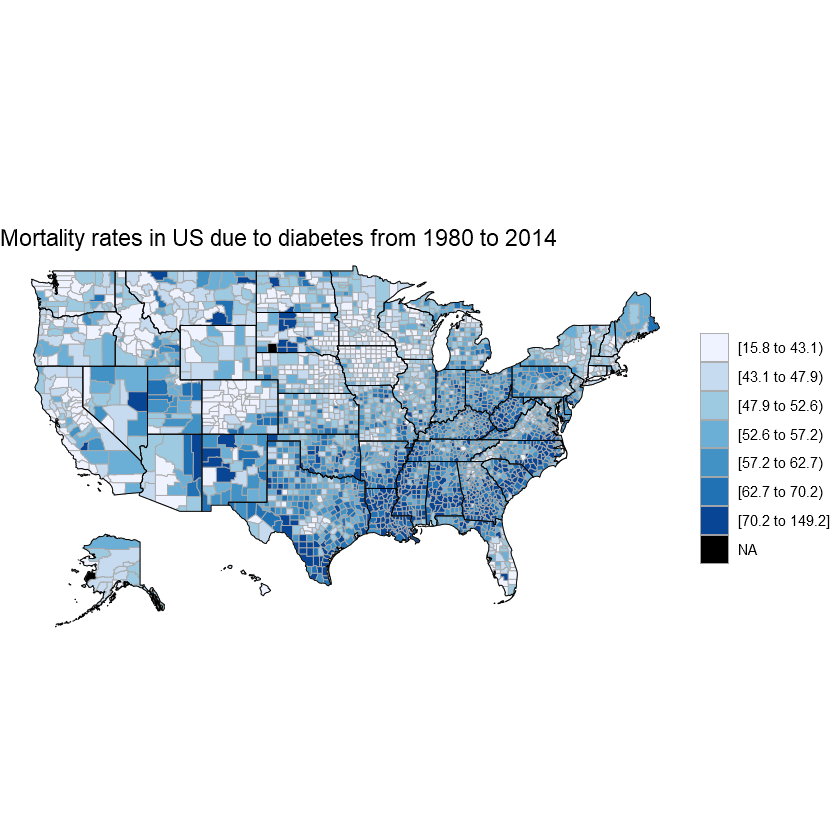

In [214]:
#Using the choropleth library and FIPS code, we are mapping the mortality rate for each county in USA

All_Counties_Mortality_map[ "FIPS"] <- sapply(All_Counties_Mortality_map[, "FIPS"], as.numeric)
columns_wanted <- c("FIPS", "Mean_Mortality")
colnames(All_Counties_Mortality_map) <- c("region", "value")
county_choropleth(All_Counties_Mortality_map,title="Mortality rates in US due to diabetes from 1980 to 2014")

In [215]:
#For finding out the average mortality rate of whole US for each year
All_Counties_Mortality<-long_final_us_df %>% group_by(Year) %>% summarize(Mean_Mortality= mean(Mortality_Rate))

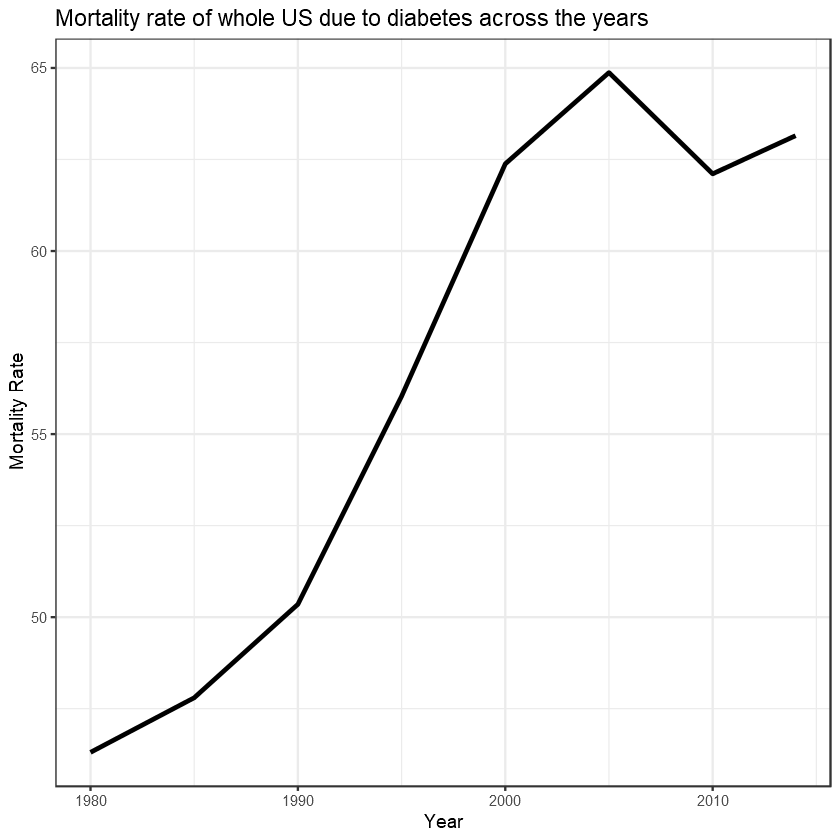

In [216]:
##Plotting time!!
All_Counties_Mortality %>% #The dataset
ggplot(aes(x = Year, y = Mean_Mortality)) + #Plotting Year on x axis, Mean_Mortality on y axis 
geom_line( show.legend = TRUE,lwd=1) +ggtitle("Mortality rate of whole US due to diabetes across the years") +
#Line graph with title
xlab("Year") + ylab("Mortality Rate")

In [217]:
#Finding the average mortality for each state in US
Top_Mortality_States<-long_final_us_df %>% group_by(State) %>% summarize(Mean_Mortality= mean(Mortality_Rate))

In [218]:
#For getting the top 6 states of US with the highest mortality rate due to diabetes
Top_Mortality_States<-Top_Mortality_States %>% arrange(desc(Mean_Mortality)) %>% slice(1:6)
Top_Mortality_States

State                 Mean_Mortality
1  Louisiana            82.13791      
2  District of Columbia 79.94375      
3  Mississippi          73.75712      
4  South Carolina       70.72628      
5  Alabama              69.38759      
6  West Virginia        69.34645

In [219]:
#For getting the bottom 4 states of US with the lowest mortality rate due to diabetes
Low_Mortality_States<-long_final_us_df %>% group_by(State) %>% summarize(Mean_Mortality= mean(Mortality_Rate))  
Low_Mortality_States<-Low_Mortality_States  %>% arrange(Mean_Mortality) %>% slice(1:4)       
Low_Mortality_States

State        Mean_Mortality
1  Colorado    40.67758      
2  Iowa        42.47967      
3  Connecticut 43.71609      
4  California  44.08134

In [220]:
#Lets get all the stes with highest and lowest mortality rates together
Top_Low_mortality_states<-Top_Mortality_States
Top_Low_mortality_states<-Top_Low_mortality_states %>% rbind(Low_Mortality_States)
Top_Low_mortality_states

State                 Mean_Mortality
1   Louisiana            82.13791      
2   District of Columbia 79.94375      
3   Mississippi          73.75712      
4   South Carolina       70.72628      
5   Alabama              69.38759      
6   West Virginia        69.34645      
7   Colorado             40.67758      
8   Iowa                 42.47967      
9   Connecticut          43.71609      
10  California           44.08134

In [221]:
#Groups state and year and gets their average mortality rate
Top_Mortality_States_Year<-long_final_us_df %>% group_by(State,Year) %>% summarize(Mean_Mortality= mean(Mortality_Rate)) %>%
                            inner_join(Top_Mortality_States %>% select(State),by="State") 
Top_Mortality_States_Year %>% head()

State    Year Mean_Mortality
1  Alabama 1980 57.56269      
2  Alabama 1985 58.87060      
3  Alabama 1990 61.92955      
4  Alabama 1995 69.41179      
5  Alabama 2000 76.78791      
6  Alabama 2005 79.60209

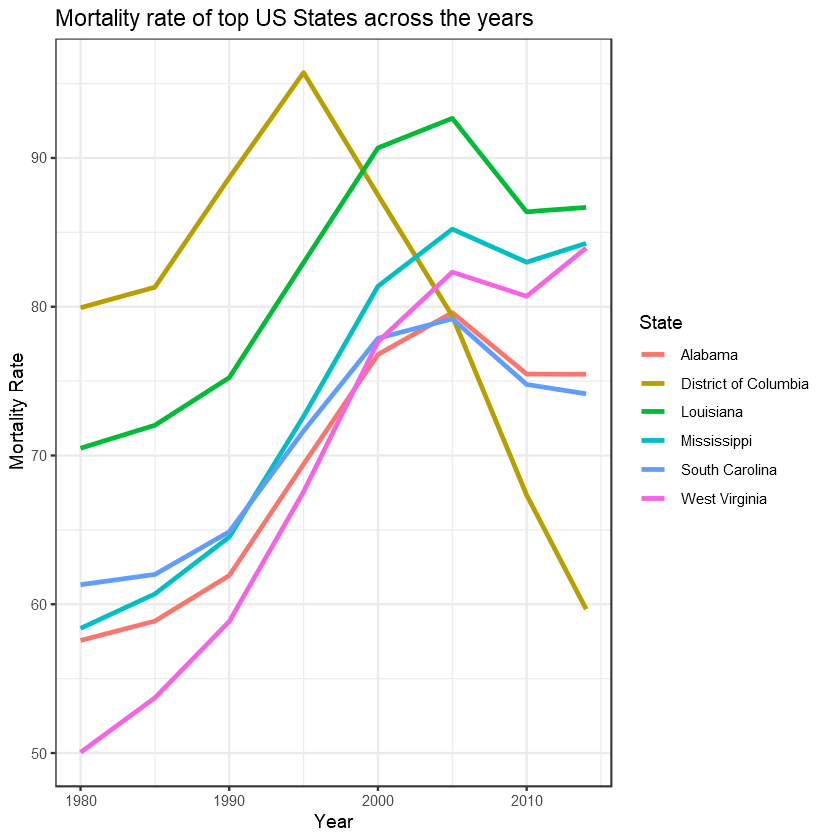

In [222]:
#Lets plot the mortality rates of top  6 states across the years
Top_Mortality_States_Year %>% #The dataset
ggplot(aes(x = Year, y = Mean_Mortality, colour = State)) + #Plotting Year on x axis, Mean_Mortality on y axis and colour according to state
geom_line( show.legend = TRUE,lwd=1) +ggtitle("Mortality rate of top US States across the years") +
#Line graph with title
xlab("Year") + ylab("Mortality Rate")

In [223]:
#Lets get all the variables for the top 6 states and bottom 4 states
Top_Mortality_States_Year2<-long_final_us_df %>% 
                            inner_join(Top_Low_mortality_states %>% select(State),by="State") 
Top_Mortality_States_Year2 %>% head()

County         State    FIPS CHANGE Year Mortality_Rate
1 Autauga County  Alabama 1001 38.63  1980 54.08         
2 Baldwin County  Alabama 1003  7.06  1980 46.30         
3 Barbour County  Alabama 1005 13.60  1980 64.02         
4 Bibb County     Alabama 1007 10.39  1980 72.25         
5 Blount County   Alabama 1009 23.78  1980 47.44         
6 Bullock County  Alabama 1011 47.82  1980 73.59

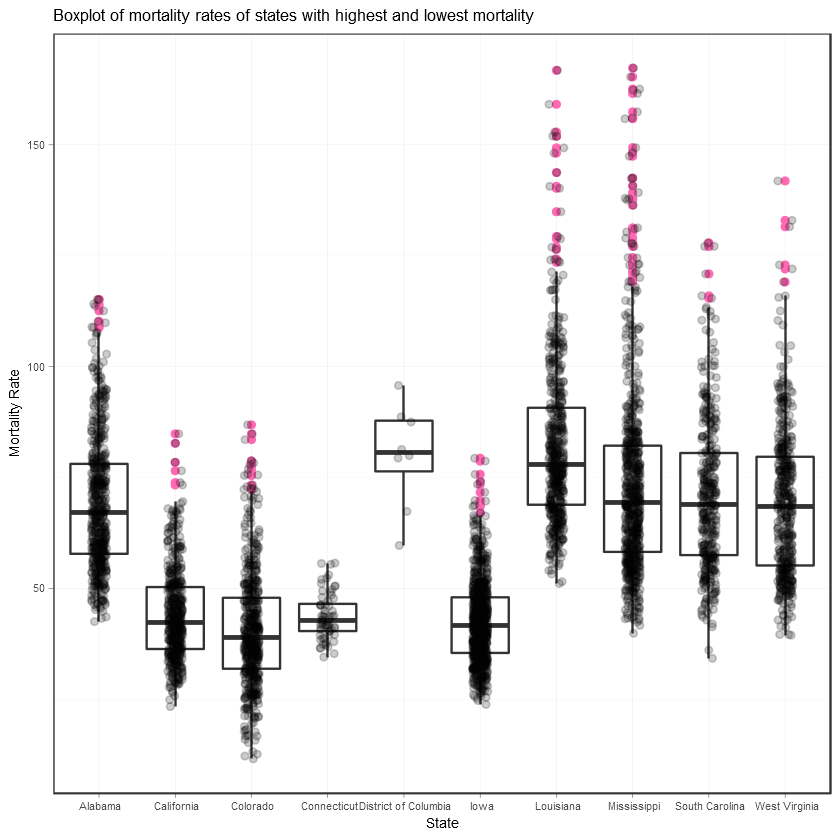

In [224]:
#A box plot of the relevant 10 states mortality rates would give us an idea about the distribution of data
Top_Mortality_States_Year2 %>% ggplot(aes(x=State, y = Mortality_Rate)) + # box plot of mortality rate for each state 
geom_boxplot(outlier.colour = "hotpink" ) + #Boxplot with outliers in hot pink colour
geom_jitter(position = position_jitter(width=0.1, height =0 ), alpha =1/5) + 
#using geom_jitter to avoid over-plotting while specifying the width and height of each box along with shading value in alpha
ggtitle("Boxplot of mortality rates of states with highest and lowest mortality") + xlab("State") +ylab("Mortality Rate") + 
   theme(text = element_text(size = 8), element_line(size = 0.1))#Specifying the size of text

## Time for a change in data

Reading the file for population of all countries. Total population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are midyear estimates. This data is sourced from following sources. (1) United Nations Population Division. World Population Prospects: 2017 Revision (2) Census reports and other statistical publications from national statistical offices (3) Eurostat: Demographic Statistics (4) United Nations Statistical Division. Population and Vital Statistics Reprot (various years) (5) U.S. Census Bureau: International Database (6) Secretariat of the Pacific Community: Statistics and Demography Programme.

In [225]:
population_df <- read_csv(file = "API_SP.POP.TOTL_DS2_en_csv_v2_10134466.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  `Country Name` = col_character(),
  `Country Code` = col_character(),
  `Indicator Name` = col_character(),
  `Indicator Code` = col_character()
)
See spec(...) for full column specifications.


In [226]:
population_df %>% glimpse()

Observations: 264
Variables: 62
$ `Country Name`   <chr> "Aruba", "Afghanistan", "Angola", "Albania", "Ando...
$ `Country Code`   <chr> "ABW", "AFG", "AGO", "ALB", "AND", "ARB", "ARE", "...
$ `Indicator Name` <chr> "Population, total", "Population, total", "Populat...
$ `Indicator Code` <chr> "SP.POP.TOTL", "SP.POP.TOTL", "SP.POP.TOTL", "SP.P...
$ `1960`           <dbl> 54211, 8996351, 5643182, 1608800, 13411, 92490932,...
$ `1961`           <dbl> 55438, 9166764, 5753024, 1659800, 14375, 95044497,...
$ `1962`           <dbl> 56225, 9345868, 5866061, 1711319, 15370, 97682294,...
$ `1963`           <dbl> 56695, 9533954, 5980417, 1762621, 16412, 100411076...
$ `1964`           <dbl> 57032, 9731361, 6093321, 1814135, 17469, 103239902...
$ `1965`           <dbl> 57360, 9938414, 6203299, 1864791, 18549, 106174988...
$ `1966`           <dbl> 57715, 10152331, 6309770, 1914573, 19647, 10923059...
$ `1967`           <dbl> 58055, 10372630, 6414995, 1965598, 20758, 11240693...
$ `1968`           <

Reading the file of diabetes prevalance rate of all countries. Diabetes prevalence refers to the percentage of people ages 20-79 who have type 1 or type 2 diabetes. This data is sourced from International Diabetes Federation, Diabetes Atlas.

In [227]:
diabetes_df <- read_csv(file = "API_SH.STA.DIAB.ZS_DS2_en_csv_v2_10136460.csv")

Parsed with column specification:
cols(
  .default = col_character(),
  `2017` = col_double()
)
See spec(...) for full column specifications.


In [228]:
#Selecting only the data for 2017 since other columns dont have any value
diabetes_df<-diabetes_df %>% select('Country Name','Country Code','Indicator Name','Indicator Code','2017')

In [229]:
diabetes_df %>% glimpse()

Observations: 264
Variables: 5
$ `Country Name`   <chr> "Aruba", "Afghanistan", "Angola", "Albania", "Ando...
$ `Country Code`   <chr> "ABW", "AFG", "AGO", "ALB", "AND", "ARB", "ARE", "...
$ `Indicator Name` <chr> "Diabetes prevalence (% of population ages 20 to 7...
$ `Indicator Code` <chr> "SH.STA.DIAB.ZS", "SH.STA.DIAB.ZS", "SH.STA.DIAB.Z...
$ `2017`           <dbl> 11.62000, 9.59000, 3.94000, 10.08000, 7.97000, 12....


In [230]:
#Selecting only the required columns for joining
population_2017_df<-population_df %>% select('Country Code','2017')

In [231]:
population_2017_df %>%  head()

Country Code 2017     
1 ABW             105264
2 AFG           35530081
3 AGO           29784193
4 ALB            2873457
5 AND              76965
6 ARB          414491886

In [232]:
#Renaming the column of 2017 in two tables to Population_2017 and Diabetes_prevalance_2017 respectively
population_2017_df  <- population_2017_df %>% rename("Population_2017" = !!names(.[2]))
diabetes_df  <- diabetes_df %>% rename("Diabetes_prevalance_2017" = !!names(.[5]))

In [233]:
population_2017_df %>% head()
diabetes_df %>% head()

Country Code Population_2017
1 ABW             105264      
2 AFG           35530081      
3 AGO           29784193      
4 ALB            2873457      
5 AND              76965      
6 ARB          414491886

Country Name Country Code Indicator Name                                     
1 Aruba        ABW          Diabetes prevalence (% of population ages 20 to 79)
2 Afghanistan  AFG          Diabetes prevalence (% of population ages 20 to 79)
3 Angola       AGO          Diabetes prevalence (% of population ages 20 to 79)
4 Albania      ALB          Diabetes prevalence (% of population ages 20 to 79)
5 Andorra      AND          Diabetes prevalence (% of population ages 20 to 79)
6 Arab World   ARB          Diabetes prevalence (% of population ages 20 to 79)
  Indicator Code Diabetes_prevalance_2017
1 SH.STA.DIAB.ZS 11.62000                
2 SH.STA.DIAB.ZS  9.59000                
3 SH.STA.DIAB.ZS  3.94000                
4 SH.STA.DIAB.ZS 10.08000                
5 SH.STA.DIAB.ZS  7.97000                
6 SH.STA.DIAB.ZS 12.07702

In [234]:
#Joining the population data and diabetes data by country code
diabetes_population<-diabetes_df %>% inner_join(population_2017_df,by="Country Code") 

In [235]:
diabetes_population %>% head()

Country Name Country Code Indicator Name                                     
1 Aruba        ABW          Diabetes prevalence (% of population ages 20 to 79)
2 Afghanistan  AFG          Diabetes prevalence (% of population ages 20 to 79)
3 Angola       AGO          Diabetes prevalence (% of population ages 20 to 79)
4 Albania      ALB          Diabetes prevalence (% of population ages 20 to 79)
5 Andorra      AND          Diabetes prevalence (% of population ages 20 to 79)
6 Arab World   ARB          Diabetes prevalence (% of population ages 20 to 79)
  Indicator Code Diabetes_prevalance_2017 Population_2017
1 SH.STA.DIAB.ZS 11.62000                    105264      
2 SH.STA.DIAB.ZS  9.59000                  35530081      
3 SH.STA.DIAB.ZS  3.94000                  29784193      
4 SH.STA.DIAB.ZS 10.08000                   2873457      
5 SH.STA.DIAB.ZS  7.97000                     76965      
6 SH.STA.DIAB.ZS 12.07702                 414491886

In [236]:
#Converting the diabetes pevalance percentage to population count
diabetes_population<-diabetes_population %>% mutate(New_diabetes_population=(Diabetes_prevalance_2017/100)*Population_2017)
diabetes_population %>% head()

Country Name Country Code Indicator Name                                     
1 Aruba        ABW          Diabetes prevalence (% of population ages 20 to 79)
2 Afghanistan  AFG          Diabetes prevalence (% of population ages 20 to 79)
3 Angola       AGO          Diabetes prevalence (% of population ages 20 to 79)
4 Albania      ALB          Diabetes prevalence (% of population ages 20 to 79)
5 Andorra      AND          Diabetes prevalence (% of population ages 20 to 79)
6 Arab World   ARB          Diabetes prevalence (% of population ages 20 to 79)
  Indicator Code Diabetes_prevalance_2017 Population_2017
1 SH.STA.DIAB.ZS 11.62000                    105264      
2 SH.STA.DIAB.ZS  9.59000                  35530081      
3 SH.STA.DIAB.ZS  3.94000                  29784193      
4 SH.STA.DIAB.ZS 10.08000                   2873457      
5 SH.STA.DIAB.ZS  7.97000                     76965      
6 SH.STA.DIAB.ZS 12.07702                 414491886      
  New_diabetes_population
1    12231.68            
2  3407334.77            
3  1173497.20            
4   289644.47            
5     6134.11            
6 50058269.71

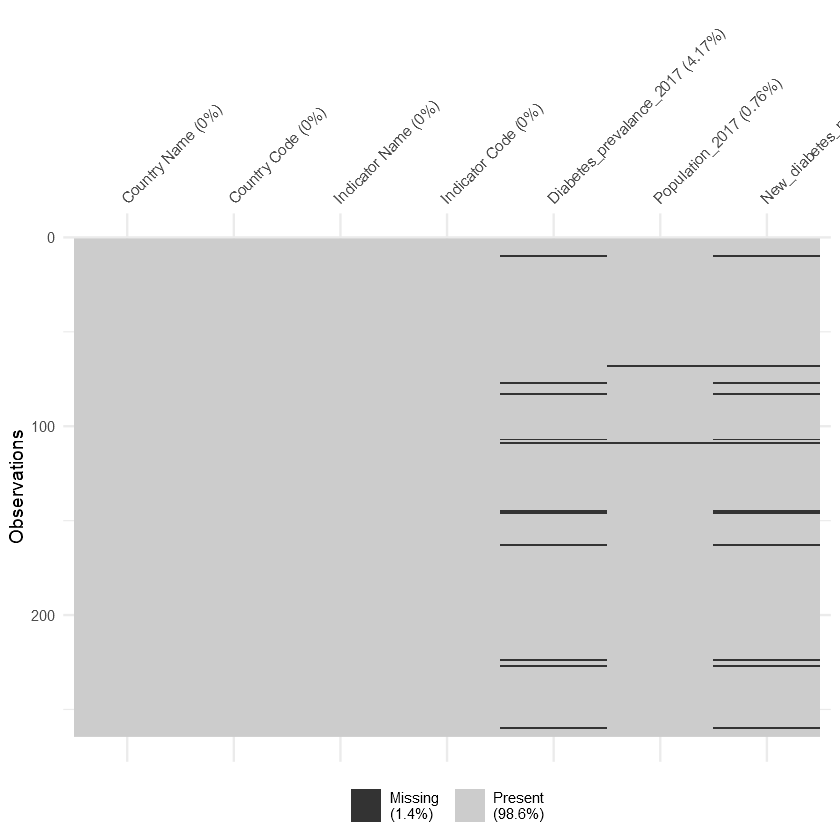

In [237]:
#For finding the missing values in the diabetes population
diabetes_population %>% vis_miss()

In [238]:
#Filtering out the countries where diabetes prevalence is NA to diabetes_free_countries
diabetes_free_countries<-diabetes_population %>% filter(is.na(Diabetes_prevalance_2017) == TRUE) 

In [239]:
#Removing the rows of countries where population data is not available
diabetes_free_countries<-diabetes_free_countries %>% drop_na(Population_2017)
diabetes_population<-diabetes_population %>% drop_na(Population_2017)

In [240]:
diabetes_free_countries

Country Name              Country Code
1  American Samoa            ASM         
2  Faroe Islands             FRO         
3  Gibraltar                 GIB         
4  Isle of Man               IMN         
5  Macao SAR, China          MAC         
6  St. Martin (French part)  MAF         
7  Northern Mariana Islands  MNP         
8  Sint Maarten (Dutch part) SXM         
9  Turks and Caicos Islands  TCA         
10 Kosovo                    XKX         
   Indicator Name                                      Indicator Code
1  Diabetes prevalence (% of population ages 20 to 79) SH.STA.DIAB.ZS
2  Diabetes prevalence (% of population ages 20 to 79) SH.STA.DIAB.ZS
3  Diabetes prevalence (% of population ages 20 to 79) SH.STA.DIAB.ZS
4  Diabetes prevalence (% of population ages 20 to 79) SH.STA.DIAB.ZS
5  Diabetes prevalence (% of population ages 20 to 79) SH.STA.DIAB.ZS
6  Diabetes prevalence (% of population ages 20 to 79) SH.STA.DIAB.ZS
7  Diabetes prevalence (% of population ages 20 to 79) SH.STA.DIAB.ZS
8  Diabetes prevalence (% of population ages 20 to 79) SH.STA.DIAB.ZS
9  Diabetes prevalence (% of population ages 20 to 79) SH.STA.DIAB.ZS
10 Diabetes prevalence (% of population ages 20 to 79) SH.STA.DIAB.ZS
   Diabetes_prevalance_2017 Population_2017 New_diabetes_population
1  NA                         55641         NA                     
2  NA                         49290         NA                     
3  NA                         34571         NA                     
4  NA                         84287         NA                     
5  NA                        622567         NA                     
6  NA                         32125         NA                     
7  NA                         55144         NA                     
8  NA                         41109         NA                     
9  NA                         35446         NA                     
10 NA                       1830700         NA

In [241]:
#Replacing the NA in both the dataframes for diabetes prevalence with 0
diabetes_free_countries<-diabetes_free_countries %>% replace_na(list(Diabetes_prevalance_2017=0,New_diabetes_population=0))
diabetes_population<-diabetes_population %>% replace_na(list(Diabetes_prevalance_2017=0,New_diabetes_population=0))

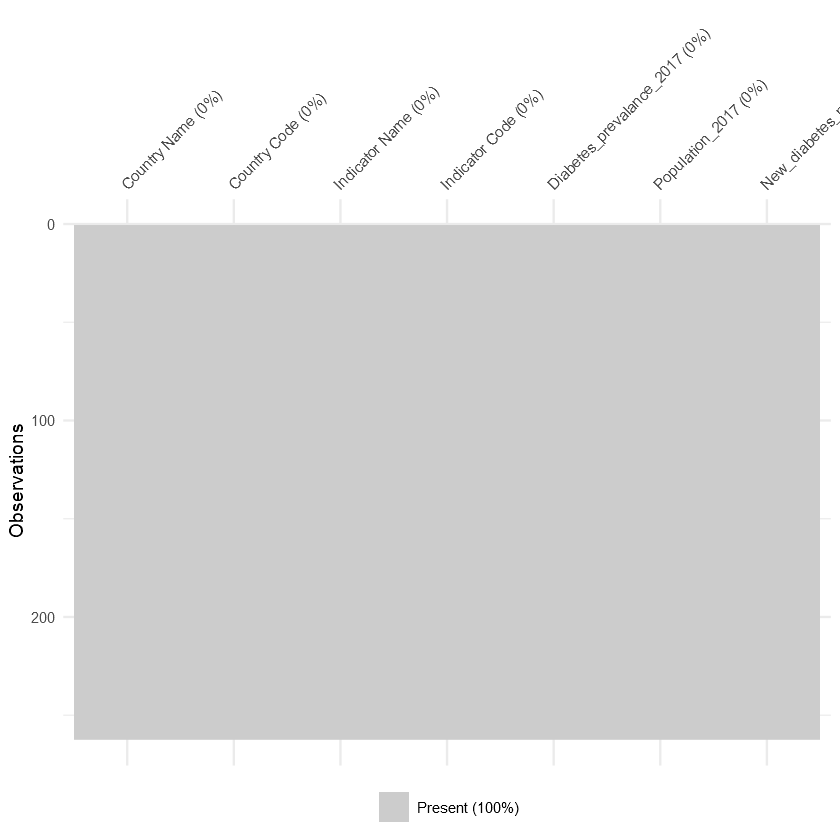

In [242]:
#Checking for missing values again and it cannot be found
diabetes_population %>% vis_miss()

## Time for some visualization now!!

In [243]:
#Using rworldmap library, we are joining our diabetes_population df with the inbuilt country data of maps using country name
mapped_data <- joinCountryData2Map(diabetes_population , joinCode = "NAME", 
    nameJoinColumn = "Country Name")

207 codes from your data successfully matched countries in the map
55 codes from your data failed to match with a country code in the map
36 codes from the map weren't represented in your data


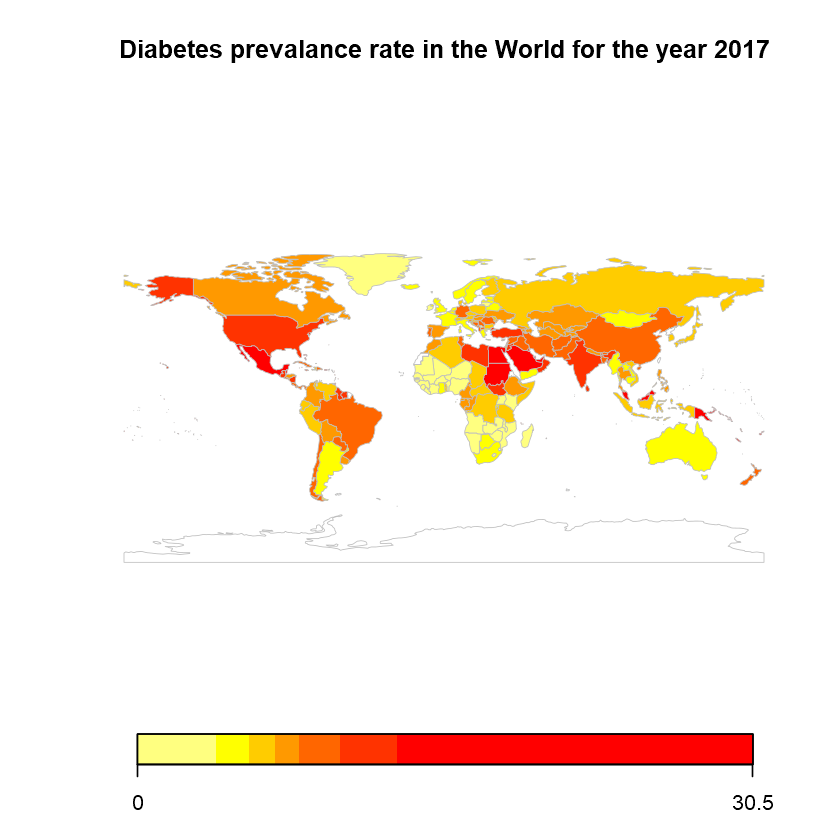

In [244]:
mapCountryData(
    mapped_data, nameColumnToPlot = "Diabetes_prevalance_2017", #Specifying the variable to plot in the map
    mapTitle = "Diabetes prevalance rate in the World for the year 2017", #Adding a title
    addLegend = "TRUE" #For showing the scale
)


In [245]:
diabetes_population %>% head()

Country Name Country Code Indicator Name                                     
1 Aruba        ABW          Diabetes prevalence (% of population ages 20 to 79)
2 Afghanistan  AFG          Diabetes prevalence (% of population ages 20 to 79)
3 Angola       AGO          Diabetes prevalence (% of population ages 20 to 79)
4 Albania      ALB          Diabetes prevalence (% of population ages 20 to 79)
5 Andorra      AND          Diabetes prevalence (% of population ages 20 to 79)
6 Arab World   ARB          Diabetes prevalence (% of population ages 20 to 79)
  Indicator Code Diabetes_prevalance_2017 Population_2017
1 SH.STA.DIAB.ZS 11.62000                    105264      
2 SH.STA.DIAB.ZS  9.59000                  35530081      
3 SH.STA.DIAB.ZS  3.94000                  29784193      
4 SH.STA.DIAB.ZS 10.08000                   2873457      
5 SH.STA.DIAB.ZS  7.97000                     76965      
6 SH.STA.DIAB.ZS 12.07702                 414491886      
  New_diabetes_population
1    12231.68            
2  3407334.77            
3  1173497.20            
4   289644.47            
5     6134.11            
6 50058269.71

Looking at the above data, it has some similiarity with the web scraped output of diabetes prevalence we got earlier

In [246]:
final_country_df %>% head

COUNTRY      YR2000 YR2030 
1 Algeria      426000 1203000
2 Angola        51000  140000
3 Benin         87000  266000
4 Botswana      25000   45000
5 Burkina Faso 124000  388000
6 Burundi       26000   72000

In [247]:
final_country_df %>% glimpse()

Observations: 145
Variables: 3
$ COUNTRY <chr> "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "...
$ YR2000  <dbl> 426000, 51000, 87000, 25000, 124000, 26000, 70000, 7000, 18...
$ YR2030  <dbl> 1203000, 140000, 266000, 45000, 388000, 72000, 171000, 2400...


We can join the two datasets final_country_df and  diabetes_population based on Country and do some more wrangling and visualization on it. For a change, lets do it in Julia. Lets prepare these datasets and export them as csv so that we can use it in Julia.

In [248]:
#Replacing all the null values
final_country_df<-final_country_df %>% replace_na(list(YR2000=0,YR2030=0))

In [249]:
#Changing the column names to its year value so that we can gather them easily in Julia
columns_wanted <- c("COUNTRY", "YR2000", "YR2030")
final_country_df2 <- final_country_df[columns_wanted]
colnames(final_country_df2) <- c("COUNTRY", "2000", "2030")
final_country_df2 %>% head()

COUNTRY      2000   2030   
1 Algeria      426000 1203000
2 Angola        51000  140000
3 Benin         87000  266000
4 Botswana      25000   45000
5 Burkina Faso 124000  388000
6 Burundi       26000   72000

In [250]:
#Now for the other dataset. Let change the name of Country variable so as to match with the previous one
diabetes_population  <- diabetes_population %>% rename("COUNTRY" = !!names(.[1]))

In [251]:
#After analysis, found that the country United States of America is different for the 2 datasets. Lets make it same
diabetes_population<-diabetes_population %>% 
  mutate(COUNTRY = ifelse(COUNTRY =="United States", 
                              "United States of America", 
                              COUNTRY))

In [252]:
diabetes_population %>% head()

COUNTRY     Country Code Indicator Name                                     
1 Aruba       ABW          Diabetes prevalence (% of population ages 20 to 79)
2 Afghanistan AFG          Diabetes prevalence (% of population ages 20 to 79)
3 Angola      AGO          Diabetes prevalence (% of population ages 20 to 79)
4 Albania     ALB          Diabetes prevalence (% of population ages 20 to 79)
5 Andorra     AND          Diabetes prevalence (% of population ages 20 to 79)
6 Arab World  ARB          Diabetes prevalence (% of population ages 20 to 79)
  Indicator Code Diabetes_prevalance_2017 Population_2017
1 SH.STA.DIAB.ZS 11.62000                    105264      
2 SH.STA.DIAB.ZS  9.59000                  35530081      
3 SH.STA.DIAB.ZS  3.94000                  29784193      
4 SH.STA.DIAB.ZS 10.08000                   2873457      
5 SH.STA.DIAB.ZS  7.97000                     76965      
6 SH.STA.DIAB.ZS 12.07702                 414491886      
  New_diabetes_population
1    12231.68            
2  3407334.77            
3  1173497.20            
4   289644.47            
5     6134.11            
6 50058269.71

In [253]:
#Now for the final part. Change the column names to remove spaces so as to make it easier to work in Julia
columns_wanted <- c("COUNTRY","Country Code","Indicator Name","Indicator Code",
                    "Diabetes_prevalance_2017","Population_2017","New_diabetes_population")
diabetes_population2<-diabetes_population[columns_wanted]
colnames(diabetes_population2) <- c("COUNTRY","Country_Code","Indicator Name","Indicator Code","Diabetes_prevalance_2017",
                                 "Population_2017","2017")
diabetes_population2 %>% head()

COUNTRY     Country_Code Indicator Name                                     
1 Aruba       ABW          Diabetes prevalence (% of population ages 20 to 79)
2 Afghanistan AFG          Diabetes prevalence (% of population ages 20 to 79)
3 Angola      AGO          Diabetes prevalence (% of population ages 20 to 79)
4 Albania     ALB          Diabetes prevalence (% of population ages 20 to 79)
5 Andorra     AND          Diabetes prevalence (% of population ages 20 to 79)
6 Arab World  ARB          Diabetes prevalence (% of population ages 20 to 79)
  Indicator Code Diabetes_prevalance_2017 Population_2017 2017       
1 SH.STA.DIAB.ZS 11.62000                    105264          12231.68
2 SH.STA.DIAB.ZS  9.59000                  35530081        3407334.77
3 SH.STA.DIAB.ZS  3.94000                  29784193        1173497.20
4 SH.STA.DIAB.ZS 10.08000                   2873457         289644.47
5 SH.STA.DIAB.ZS  7.97000                     76965           6134.11
6 SH.STA.DIAB.ZS 12.07702                 414491886       50058269.71

In [254]:
#Exports the resultant datasets to csv so that we can read them in Julia
write_csv(diabetes_population2,"diabetes_population.csv")
write_csv(final_country_df2,"final_country_df.csv")